In [118]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

593


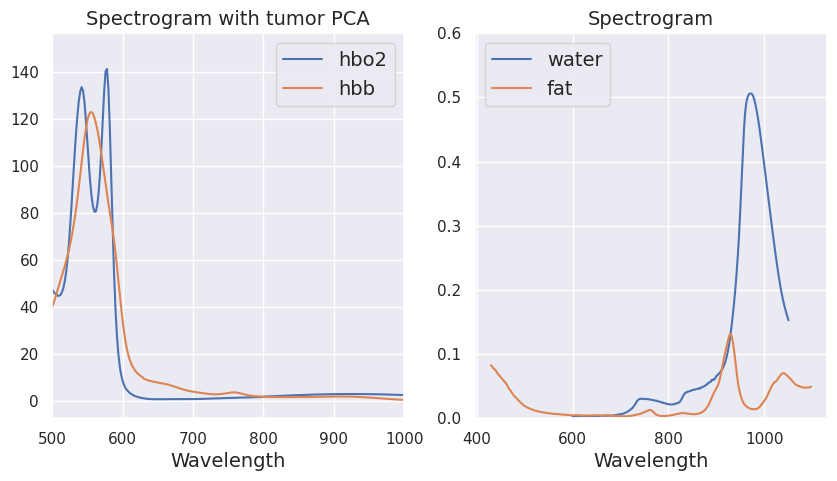

In [119]:
#Loading and processing

path_absorp = "/home/ivan/aimlab/UCL-NIR-Spectra/spectra/"
hbo2_absorp = path_absorp + "hb02.txt"
hhb_absorp = path_absorp + "hb.txt"
water_absorp = path_absorp + "matcher94_nir_water_37.txt"
diff_cyto_absorp = path_absorp + "cytoxidase_diff_odmMcm.txt"
fat_absorp = path_absorp + "fat.txt"
cytoa_oxy_absorp = path_absorp + "moody cyt aa3 oxidised.txt"
cytoa_red_absorp = path_absorp + "moody cyt aa3 reduced.txt"
cytob_oxy_absorp = path_absorp + "cope cyt b oxidised.txt"
cytob_red_absorp = path_absorp + "cope cyt b reduced.txt"
cytoc_oxy_absorp = path_absorp + "cooper pig c oxidised.txt"
cytoc_red_absorp = path_absorp + "cooper pig c reduced.txt"
cytoc_red_absorp = path_absorp + "cooper pig c reduced.txt"
hb450_absorp = path_absorp + "z_adult_hb_450_630.txt"
hb600_absorp = path_absorp + "z_adult_hb_600_800.txt"
hbo2_450_absorp = path_absorp + "z_adult_hbo2_450_630.txt"
hbo2_600_absorp = path_absorp + "z_adult_hbo2_600_800.txt"


### reading cpectra from .txt
def read_spectra(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

x_coxa, y_coxa = read_spectra(cytoa_oxy_absorp) # cytochrome oxydised
x_creda, y_creda = read_spectra(cytoa_red_absorp) # cytochrome reduced
x_coxb, y_coxb = read_spectra(cytob_oxy_absorp) # cytochrome oxydised
x_credb, y_credb = read_spectra(cytob_red_absorp) # cytochrome reduced
x_coxc, y_coxc = read_spectra(cytoc_oxy_absorp) # cytochrome oxydised
x_credc, y_credc = read_spectra(cytoc_red_absorp) # cytochrome reduced

x_hbo2, y_hbo2 = read_spectra(hbo2_absorp) # oxyhemoglobin
x_hb, y_hb = read_spectra(hhb_absorp) # hemoglobin
x_hb_450, y_hb_450 = read_spectra(hb450_absorp) # hemoglobin
x_hb_600, y_hb_600 = read_spectra(hb600_absorp) # hemoglobin
x_hbo2_450, y_hbo2_450 = read_spectra(hbo2_450_absorp) # hemoglobin
x_hbo2_600, y_hbo2_600 = read_spectra(hbo2_600_absorp) # hemoglobin
x_hbo2_f = x_hbo2_450 + x_hbo2_600 + x_hbo2[151:]
x_hb_f = x_hb_450 + x_hb_600[30:] + x_hb[151:]

x_water, y_water = read_spectra(water_absorp) # water
x_fat, y_fat = read_spectra(fat_absorp)

y_hb_450 = [i * 2.3025851 for i in y_hb_450] # from extinction to absorption  
y_hb_600 = [i * 2.3025851 for i in y_hb_600] # from extinction to absorption  
y_hbo2_450 = [i * 2.3025851 for i in y_hbo2_450] # from extinction to absorption  
y_hbo2_600 = [i * 2.3025851 for i in y_hbo2_600] # from extinction to absorption  
y_coxa = [i * 2.3025851 for i in y_coxa] # from extinction to absorption  
y_creda = [i * 2.3025851 for i in y_creda] # from extinction to absorption
y_coxb = [i * 2.3025851 for i in y_coxb] # from extinction to absorption  
y_credb = [i * 2.3025851 for i in y_credb] # from extinction to absorption 
y_coxc = [i * 2.3025851 for i in y_coxc] # from extinction to absorption  
y_credc = [i * 2.3025851 for i in y_credc] # from extinction to absorption 
y_water = [i * 2.3025851 for i in y_water] # from extinction to absorption  
y_hbo2 = [i * 10 * 1000 for i in y_hbo2] # from mm and micromole to cm and minimole 
y_hb = [i * 10 * 1000 for i in y_hb] # from mm and micromole to cm and minimole
y_fat = [i / 100 for i in y_fat] # from m to cm 

# interpolate till 800nm as the data have value for every second nm, 400,402,404...
xvals = [i for i in range(int(x_hbo2_450[0]), int(x_hbo2_600[-1])+1)]
yinterp = np.interp(xvals, x_hbo2_450 + x_hbo2_600, np.asarray(y_hbo2_450+y_hbo2_600))
x_hbo2_f = xvals+x_hbo2[151:]
y_hbo2_f  = np.concatenate((yinterp,np.asarray(y_hbo2[151:])), axis=None)

xvals = [i for i in range(int(x_hb_450[0]), int(x_hb_600[-1])+1)]
yinterp = np.interp(xvals, x_hb_450 + x_hb_600, np.asarray(y_hb_450+y_hb_600))
x_hb_f = xvals+x_hb[151:]
y_hb_f = np.concatenate((yinterp,np.asarray(y_hb[151:])), axis=None) 


### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

#ax.plot(x_coxa, y_coxa, label='cya_ox')
#ax.plot(x_creda, y_creda, label='cya_red')
#ax.plot(x_coxb, y_coxb, label='cyb_ox')
#ax.plot(x_credb, y_credb, label='cyb_red')
#ax.plot(x_coxc, y_coxc, label='cyc_ox')
#ax.plot(x_credc, y_credc, label='cyc_red')
ax.plot(x_hbo2_f, y_hbo2_f, label='hbo2')
ax.plot(x_hb_f, y_hb_f, label='hbb')
#ax.plot(x_water, y_water, label='water')
#ax.plot(x_fat, y_fat, label='fat')

ax.set_title("Spectrogram with tumor PCA", fontsize=14)
ax.set_xlabel("Wavelength", fontsize=14)

ax.set_xlim(500, 1000)
#ax.set_ylim(0, 10)
ax.legend(fontsize=14)

    
ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=14)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=14)
#ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=14)
print(len(y_hb_f))

In [120]:
# cutting all spectra to the range [left_cut, right_cut] nm
left_cut = 600
right_cut = 999

import bisect
ix_left = x_coxa.index(left_cut)
ix_right = x_coxa.index(right_cut)
x = x_coxa[bisect.bisect_left(x_coxa, left_cut):bisect.bisect_right(x_coxa, right_cut)]
y_coxa = y_coxa[ix_left:ix_right+1]

ix_left = x_creda.index(left_cut)
ix_right = x_creda.index(right_cut)
y_creda = y_creda[ix_left:ix_right+1]

ix_left = x_water.index(left_cut)
ix_right = x_water.index(right_cut)
y_water = y_water[ix_left:ix_right+1]

ix_left = x_hbo2_f.index(left_cut)
ix_right = x_hbo2_f.index(right_cut)
y_hbo2_f = y_hbo2_f[ix_left:ix_right+1]

ix_left = x_hb_f.index(left_cut)
ix_right = x_hb_f.index(right_cut)
y_hb_f = y_hb_f[ix_left:ix_right+1]

ix_left = x_fat.index(left_cut)
ix_right = x_fat.index(right_cut)
y_fat = y_fat[ix_left:ix_right+1]

print(len(y_hb_f))

400


# Let's try do simple least-squared fitting 

In [121]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, Bounds
from scipy.optimize import brute, differential_evolution

In [122]:
# build a synthetic spectra (with fixed parameters) to validate accuracy of optimization
a_w=0.05 
a_f=0.07 
a_hbo2=0.8 
a_hb=0.1
a_coxa=0.01 
a_creda=0.02 


Text(0.5, 1.0, 'Synthetic spectrogram')

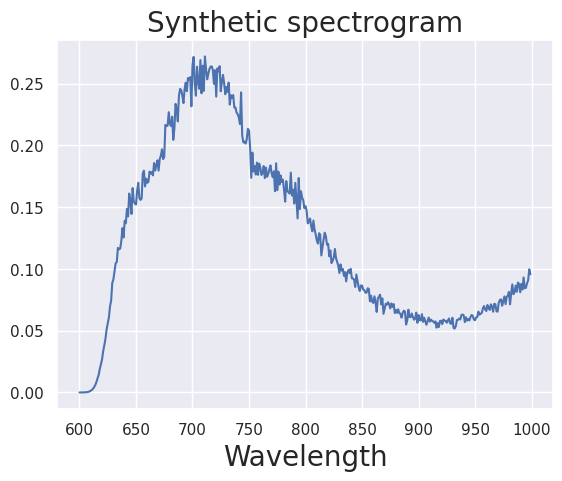

In [123]:
# 6 parameters plugged into Beer-Lambert law

def beerlamb(wavelength_range, a_w, a_f, a_hbo2, a_hb, a_cox, a_cred):
    y = []
    
    for i in wavelength_range:
        step = int(i - left_cut)
        #print(step)
        m_a = a_w*np.asarray(y_water[step]) + a_f*np.asarray(y_fat[step]) + a_hbo2*np.asarray(y_hbo2_f[step]) \
             + a_hb*np.asarray(y_hb_f[step]) + a_cox*np.asarray(y_coxa[step]) + a_cred*np.asarray(y_creda[step])
        #m_s = s_blood*np.asarray(mu_s_blood[xx]) + s_wm*np.asarray(mu_s_wm[xx]) + s_gm*np.asarray(mu_s_gm[xx])
        
        exp_m = np.exp(- m_a) # - m_s)
        
        sp = exp_m**2  # signal Power
        snr = 600 # signal to noise ratio
        std_n = ( sp / snr )**0.5 # noise std. deviation
                
        y.append(exp_m + np.random.normal(0, std_n, 1)[0])

        
    return y # I = I_o * exp(-(m_a+m_s)x)  


synth_spect2 = beerlamb(x, a_w, a_f, a_hbo2, a_hb, a_coxa, a_creda)

### Visualising synthetic spectrogram
plt.plot(x, synth_spect2)
plt.xlabel("Wavelength", fontsize=20)
plt.title("Synthetic spectrogram", fontsize=20)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.3394e-01                                    3.82e+05    
       1              3         3.3142e-01      2.52e-03       3.09e-09       6.28e+05    
`xtol` termination condition is satisfied.
Function evaluations 3, initial cost 3.3394e-01, final cost 3.3142e-01, first-order optimality 6.28e+05.
[0.05 0.05 0.5  0.05 0.05 0.05]


Text(0.5, 1.0, 'Inferred spectrogram')

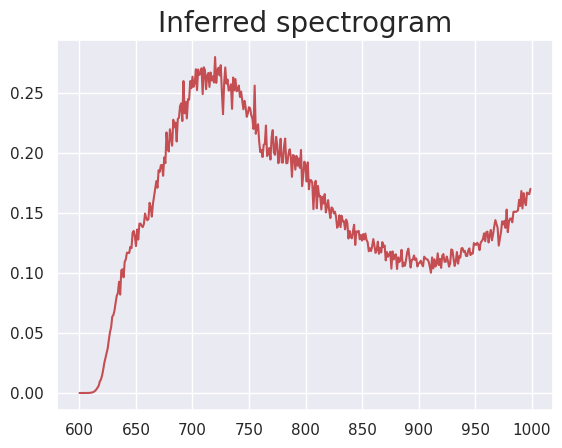

In [124]:
# Now we do least-squared curve fitting
popt, pcov = curve_fit(beerlamb, x, synth_spect2, bounds=(0, [0.1, 0.1, 1., 0.1, 0.1, 0.1]),
                      method='trf', verbose=2)
print(popt)
plt.plot(x, beerlamb(x, *popt), 'r-')
plt.title("Inferred spectrogram", fontsize=20)

Hmm... Inferred parameters are not really the same

ground truth: [a_w=0.05,a_f=0.07,a_hbo2=0.8,a_hb=0.1,a_coxa=0.01,a_creda=0.02]

inferred: [0.05,0.05,0.50000001,0.05000001,0.05000001,0.05]

# Ok, let's look at different constrained optimization methods
Now we generate a dataset of 10^3 spectra and try to see how many parameters one can infer using different methods

In [125]:
### sample randomly coefficients of the composition

In [126]:
def sample_params(n):
    
    a_w = []
    a_f = []
    a_hbo2 = []
    a_hbb = []
    a_cox = []
    a_cred = []
    
    a_all = [a_w, a_f, a_hbo2, a_hbb, a_cox, a_cred]

    #we wanna all a_i to sum up to 1, so we sample from dirichlet distribution
    values = np.random.dirichlet(np.ones(n),size=1)
        
    for j in range(n):
        a_all[j].append(values[0][j])
    
    return [x[0] for x in a_all if x]

In [127]:
sample_params(6)

[0.11527110707952343,
 0.10218435219790542,
 0.10392610184636866,
 0.18179290537903273,
 0.0667020896080202,
 0.4301234438891497]

In [153]:
molecules = [np.asarray(y_water), np.asarray(y_fat),np.asarray(y_hbo2_f),
                     np.asarray(y_hb_f), np.asarray(y_coxa),np.asarray(y_creda)]
        
        
def beerlamb_multi(wavelength_range, a_all):
    y = []
    
    
    for i in wavelength_range:
        m_a = 0
        step = int(i - left_cut)
        
        #molecules = [np.asarray(y_water[step]), np.asarray(y_fat[step]),np.asarray(y_hbo2_f[step]),
        #             np.asarray(y_hb_f[step]), np.asarray(y_coxa[step]),np.asarray(y_creda[step])]
        
        
        for j in range(len(a_all)):
            m_a += a_all[j]*molecules[j][step]
        
        exp_m = np.exp(- m_a) 
        
        sp = exp_m**2  # signal Power
        snr = 8000 # signal to noise ratio
        std_n = ( sp / snr )**0.5 # noise std. deviation
                
        y.append(exp_m + np.random.normal(0, std_n, 1)[0])

        
    return y # I = I_o * exp(-(m_a+m_s)x)  

Text(0.5, 1.0, 'Synthetic spectrogram')

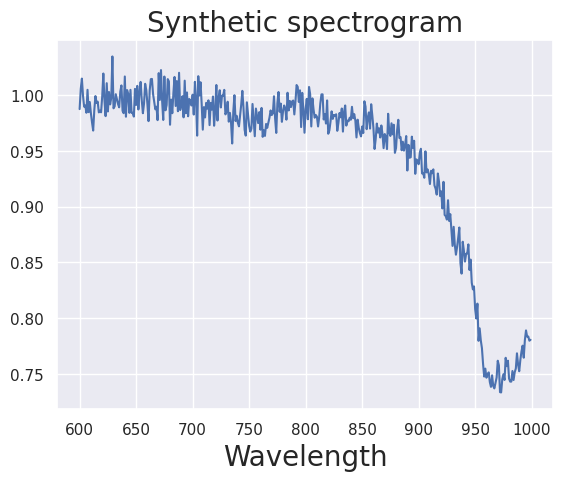

In [154]:
beerlamb_multi(x, sample_params(6))
### Visualising synthetic spectrogram
plt.plot(x, beerlamb_multi(x, sample_params(2)))
plt.xlabel("Wavelength", fontsize=20)
plt.title("Synthetic spectrogram", fontsize=20)

In [155]:
# Now we create the dataset by plugging the sampled coefficients
number_of_samples = int(100)
synth_spect_dataset = [[] for x in range(5)]
synth_spect_params = [[] for x in range(5)]


for i in range(number_of_samples): 
    
    #2 parameters, other - fixed
    params = sample_params(2)
    synth_spect_dataset[0].append(beerlamb_multi(x, params))
    synth_spect_params[0].append(params)
    
    #3 parameters, other - fixed
    params = sample_params(3)
    synth_spect_dataset[1].append(beerlamb_multi(x, params))
    synth_spect_params[1].append(params)
    
    #4 parameters, other - fixed
    params = sample_params(4)
    synth_spect_dataset[2].append(beerlamb_multi(x, params))
    synth_spect_params[2].append(params)
    
    #5 parameters, other - fixed
    params = sample_params(5)
    synth_spect_dataset[3].append(beerlamb_multi(x, params))
    synth_spect_params[3].append(params)
    
    #6 parameters, other - fixed
    params = sample_params(6)
    synth_spect_dataset[4].append(beerlamb_multi(x, params))
    synth_spect_params[4].append(params)
    


### Let's write down our linear system

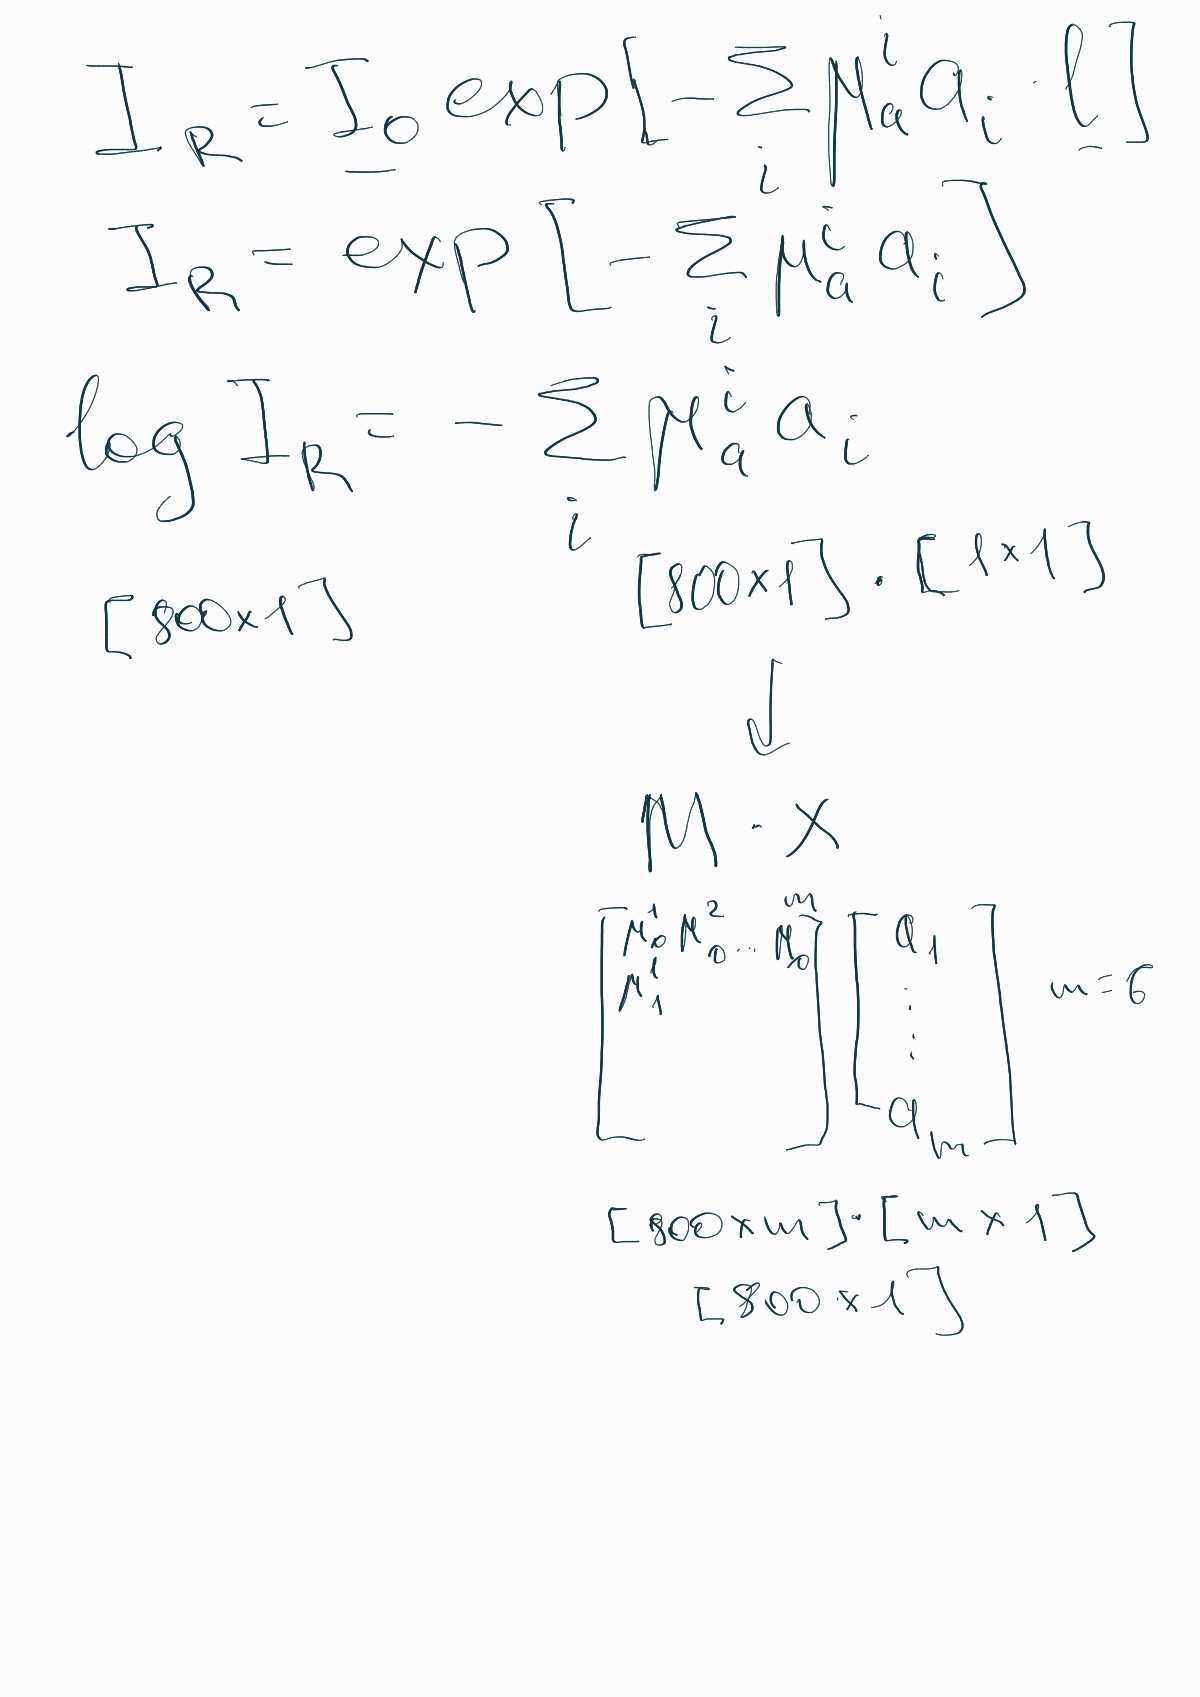

In [158]:
import cvxpy as cp
import numpy as np

spect_error = []
param_error = []

# loop over all spectra we generated and see how accurate it is
for i in range(number_of_samples):
    # Problem data.
    n = len(synth_spect_dataset[0][i]) # number of wavelength
    m = len(synth_spect_params[0][i]) # number of parameters (from 2 to 6)
    np.random.seed(1)
    M = np.transpose(np.vstack((np.asarray(y_water), np.asarray(y_fat))))
    b = synth_spect_dataset[0][i]
    b = np.log(1/np.asarray(b)) # see the writting above (we took log of I_R and there was also minus that went to the degree of the logarithm)

    # Construct the problem.
    X = cp.Variable(m)
    objective = cp.Minimize(cp.sum_squares(M @ X - b))
    constraints = [0 <= X, X <= 1, cp.sum(X)==1]
    prob = cp.Problem(objective)# ,constraints)

    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    
    # The optimal value for x is stored in `x.value`.
    print('Pred: ', X.value)
    print('GT:   ', np.round(synth_spect_params[0][i], 8))
    # The optimal Lagrange multiplier for a constraint is stored in
    # `constraint.dual_value`.
    #print(constraints[0].dual_value)
    
    # Compute difference in spectra and params
    diff = np.asarray(beerlamb_multi(x, X.value)) - np.asarray(synth_spect_dataset[0][i])
    #print(diff)
    spect_error.append(np.mean(np.abs(diff)))
    param_error.append(X.value - np.round(synth_spect_params[0][i], 8))
    
    #plotting
#     plt.plot(x, beerlamb_multi(x, X.value))
#     plt.xlabel("Wavelength", fontsize=20)
#     plt.title("Synthetic spectrogram", fontsize=20)
#     plt.plot(x, beerlamb_multi(x, np.round(synth_spect_params[0][i], 8)))
#     plt.xlabel("Wavelength", fontsize=20)
#     plt.title("Synthetic spectrogram", fontsize=20)
#     plt.show()
    #break

Pred:  [0.64963361 0.37382061]
GT:    [0.65227035 0.34772965]
Pred:  [0.05498449 0.97299833]
GT:    [0.057418 0.942582]
Pred:  [0.60120734 0.39681717]
GT:    [0.59947223 0.40052777]
Pred:  [0.34643461 0.62650316]
GT:    [0.34456626 0.65543374]
Pred:  [0.39941762 0.60104465]
GT:    [0.40158086 0.59841914]
Pred:  [0.19226358 0.7899039 ]
GT:    [0.1931899 0.8068101]
Pred:  [0.48062496 0.5296692 ]
GT:    [0.48352965 0.51647035]
Pred:  [0.25832582 0.71888206]
GT:    [0.25889214 0.74110786]
Pred:  [0.07489998 0.91558674]
GT:    [0.06778195 0.93221805]
Pred:  [0.12998513 0.8868912 ]
GT:    [0.12880667 0.87119333]
Pred:  [0.0668886 0.9080882]
GT:    [0.07008453 0.92991547]
Pred:  [0.02092044 1.01181868]
GT:    [0.03223649 0.96776351]
Pred:  [0.262346  0.7574396]
GT:    [0.27018426 0.72981574]
Pred:  [0.654299  0.3219421]
GT:    [0.64814421 0.35185579]
Pred:  [0.99227762 0.02710567]
GT:    [0.99451714 0.00548286]
Pred:  [0.56718111 0.44990336]
GT:    [0.56721446 0.43278554]
Pred:  [0.80125657 0

Pred:  [0.29182062 0.26073659 0.01427384 0.05764999 0.0922622  0.28325676]
GT:    [0.29396429 0.25811783 0.01473049 0.05779172 0.09212408 0.28327159]


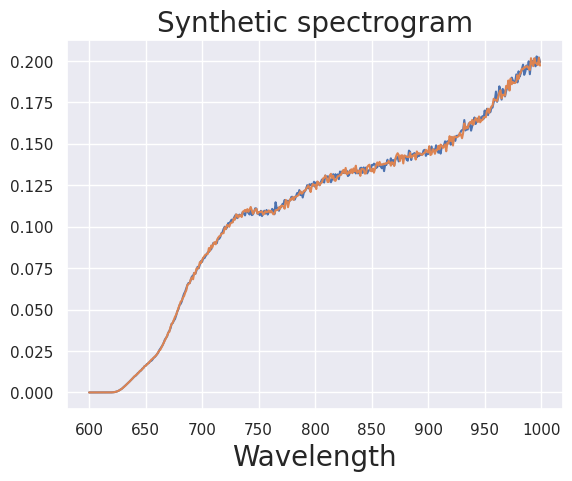

Pred:  [0.04501278 0.12300046 0.25557556 0.12886971 0.12551024 0.32203125]
GT:    [0.04972207 0.11921935 0.25451196 0.1289666  0.12556246 0.32201756]


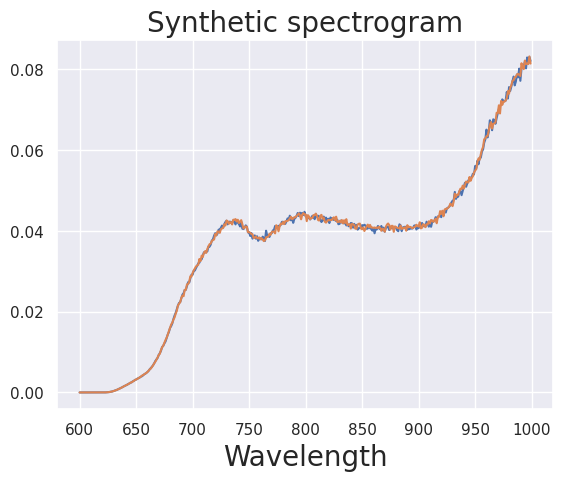

Pred:  [0.33306583 0.11216436 0.23702854 0.01556201 0.06990309 0.23227617]
GT:    [0.32863462 0.11507768 0.23830043 0.01634035 0.06937197 0.23227496]


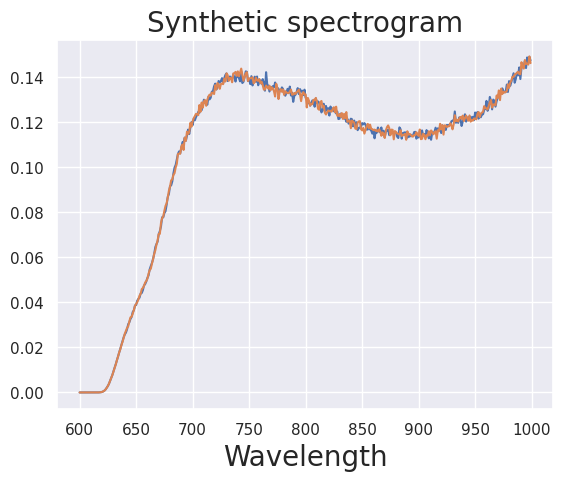

Pred:  [0.15425194 0.42575844 0.02352243 0.12398231 0.24693633 0.02554855]
GT:    [0.14908731 0.43063676 0.02383635 0.12403939 0.24686306 0.02553714]


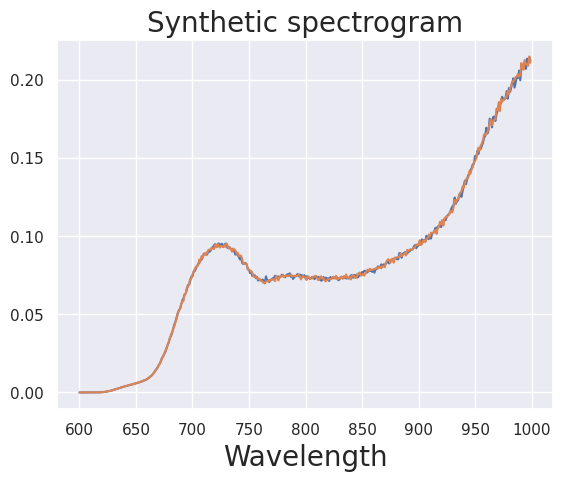

Pred:  [0.07291304 0.3500392  0.24523591 0.0698983  0.14190186 0.12001169]
GT:    [0.06828821 0.35436981 0.24559089 0.06986715 0.14195272 0.11993121]


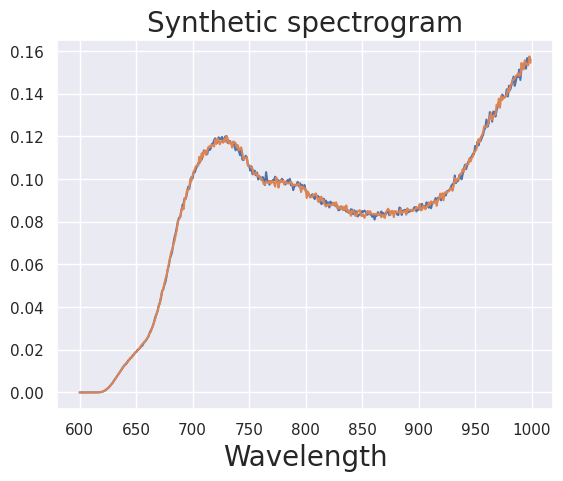

Pred:  [0.40791838 0.07455426 0.23312796 0.19382495 0.05046054 0.04011391]
GT:    [0.40701889 0.07524584 0.23321682 0.1940765  0.05036604 0.04007591]


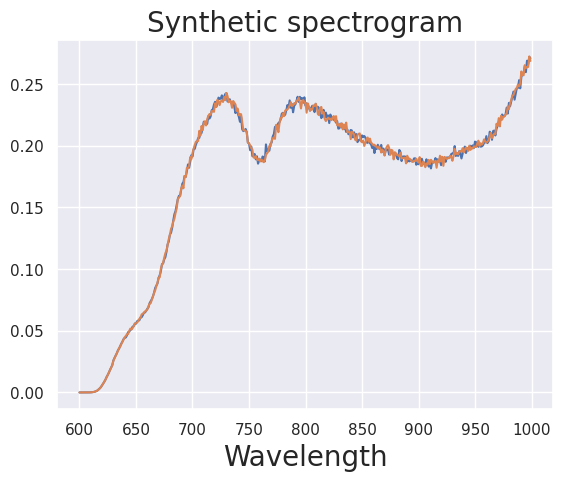

Pred:  [0.45643029 0.23522865 0.01709684 0.06561991 0.20956305 0.01606126]
GT:    [0.44912651 0.24080356 0.01860078 0.0665295  0.2089419  0.01599776]


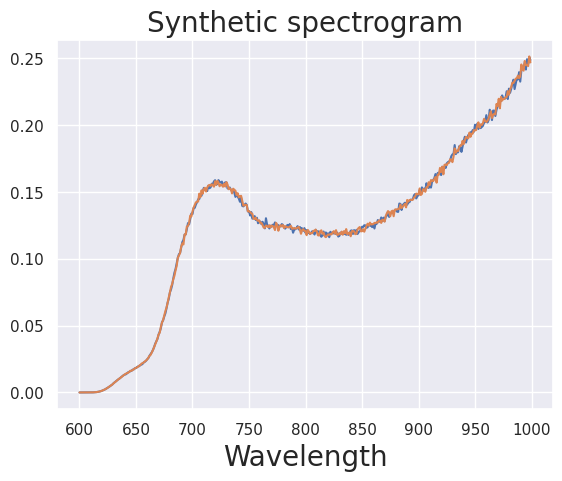

Pred:  [0.08827439 0.01223674 0.09288376 0.3943672  0.01105813 0.40117979]
GT:    [0.08890447 0.01155278 0.09283154 0.39454566 0.01095749 0.40120805]


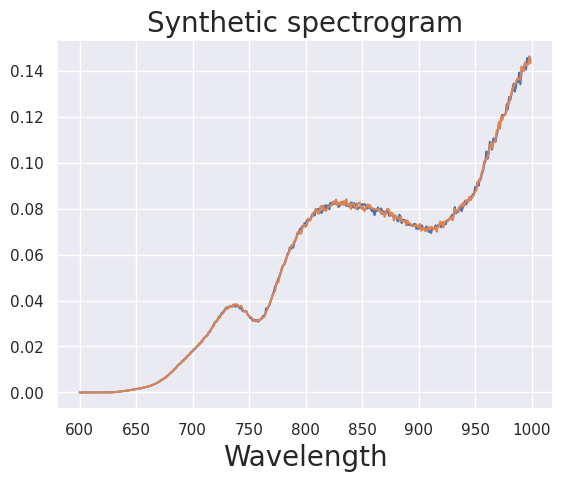

Pred:  [0.42436536 0.13008786 0.031243   0.24380771 0.16041966 0.01007641]
GT:    [0.42020265 0.1328586  0.03224788 0.2447572  0.16002061 0.00991305]


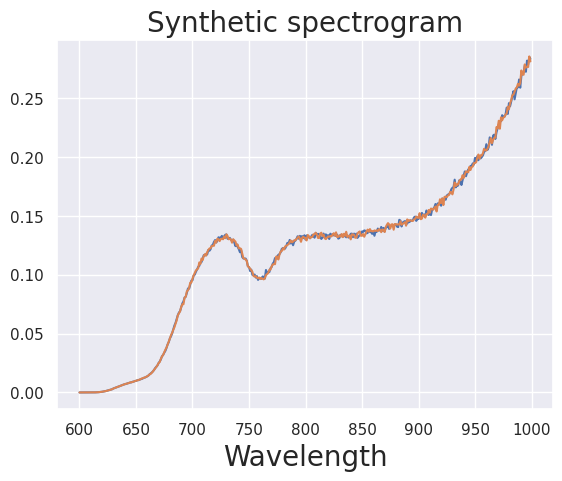

Pred:  [0.19106223 0.00749875 0.26560103 0.03653963 0.34256993 0.15672843]
GT:    [0.19081264 0.0074155  0.26578705 0.03676811 0.34245327 0.15676343]


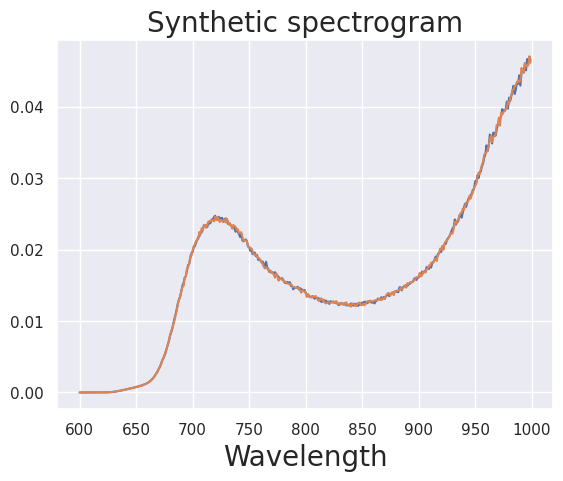

Pred:  [0.17593811 0.06768455 0.01961318 0.26063705 0.29986069 0.17626642]
GT:    [0.16935617 0.07254957 0.02110194 0.26123049 0.29951559 0.17624624]


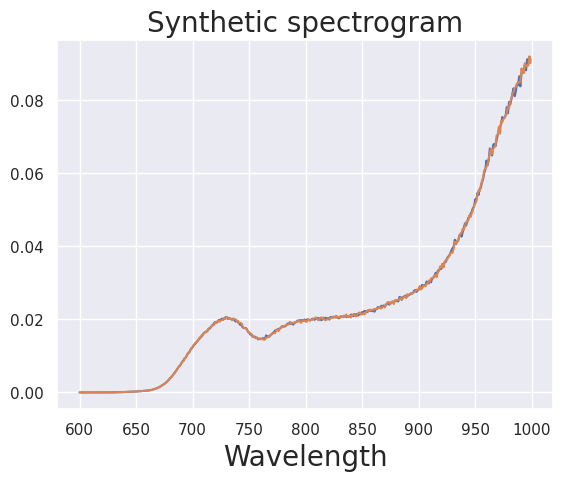

Pred:  [0.48068564 0.15142796 0.02523112 0.15124228 0.0264936  0.16491939]
GT:    [0.47905954 0.15303746 0.02541278 0.15098772 0.02652388 0.16497862]


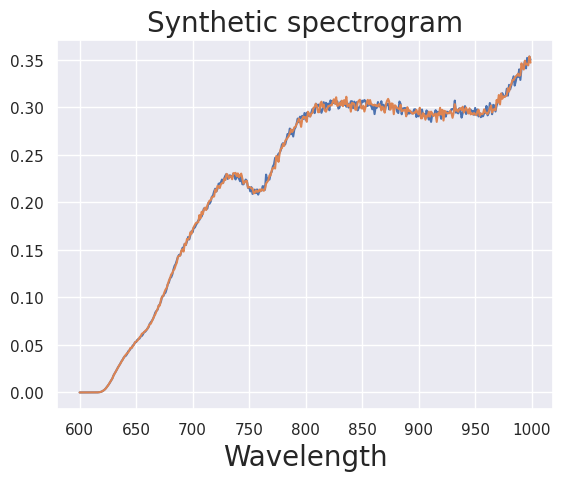

Pred:  [0.16354029 0.23068541 0.0232397  0.06277015 0.4027865  0.11697795]
GT:    [0.1609013  0.2345353  0.02255856 0.06167581 0.40325765 0.11707138]


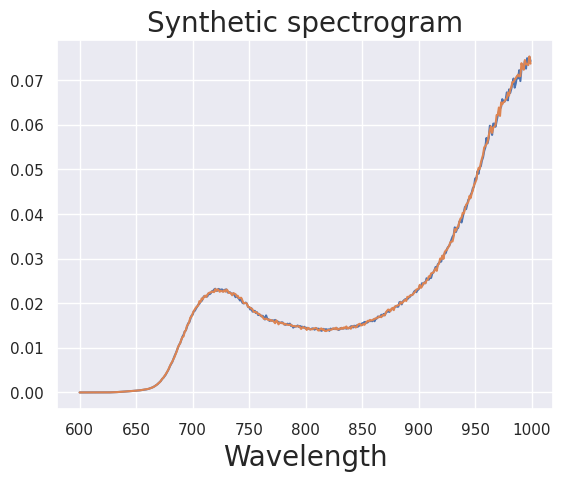

Pred:  [0.1423862  0.08222481 0.08156931 0.02558334 0.07349603 0.59474031]
GT:    [0.14054368 0.08465989 0.08130801 0.02492296 0.07374046 0.59482499]


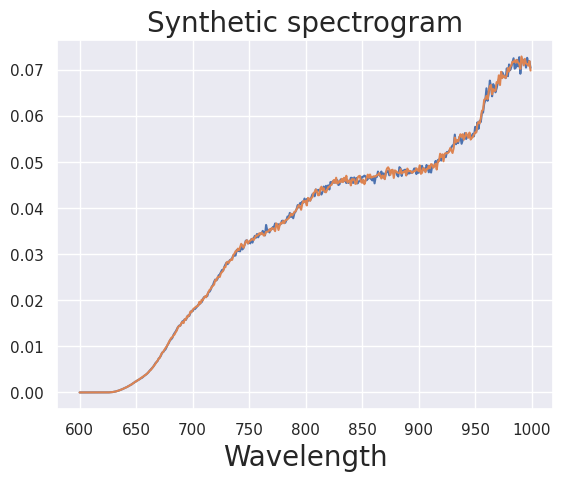

Pred:  [0.06302838 0.05825375 0.09183342 0.01502357 0.76995843 0.00190245]
GT:    [0.06762766 0.05430542 0.0913249  0.01467186 0.77015612 0.00191403]


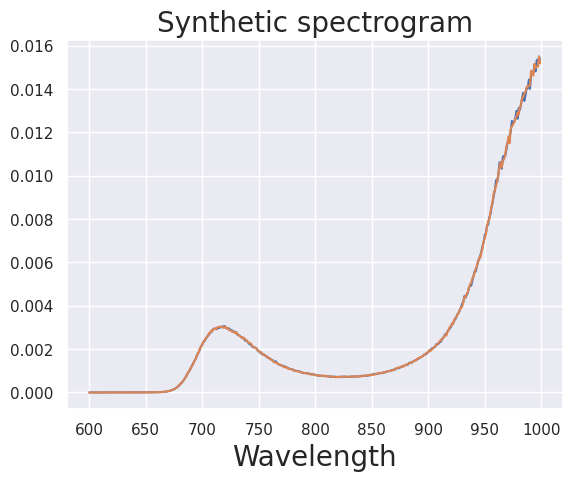

Pred:  [0.09748743 0.04136855 0.1854725  0.04734222 0.40718101 0.22114829]
GT:    [0.09685511 0.04203192 0.18554964 0.04708801 0.40725542 0.2212199 ]


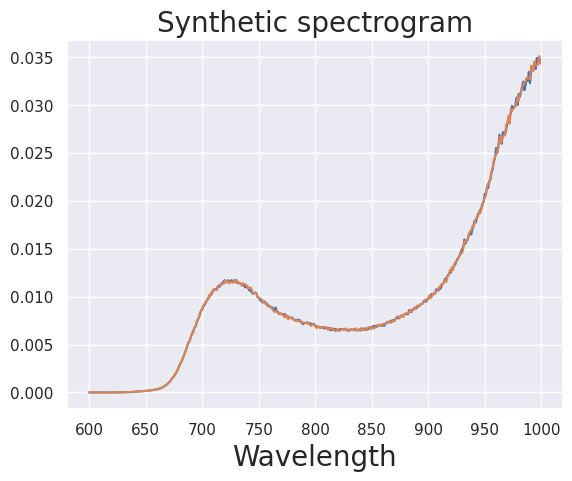

Pred:  [0.34486226 0.05760575 0.04509189 0.04981465 0.03676458 0.46586087]
GT:    [0.33681708 0.06558964 0.04527819 0.04958901 0.03683514 0.46589094]


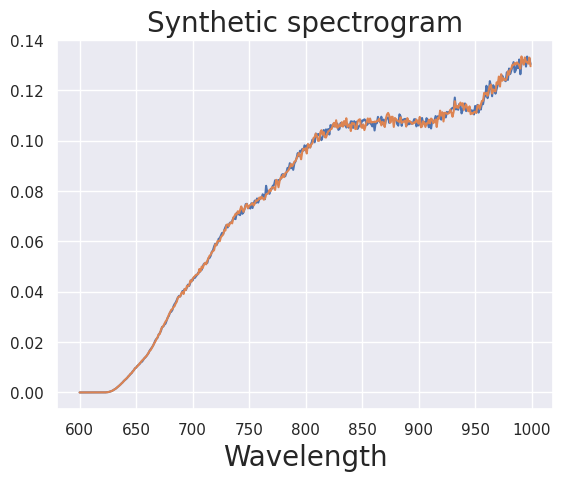

Pred:  [0.41802648 0.2207541  0.04877242 0.0747074  0.04564506 0.19209454]
GT:    [0.42713858 0.21244124 0.04811265 0.07432675 0.04578193 0.19219884]


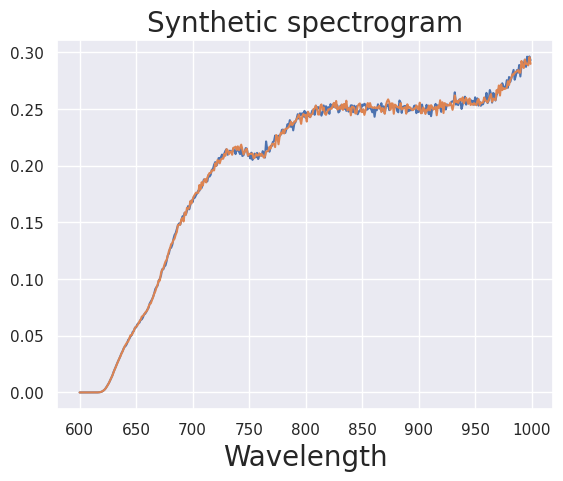

Pred:  [0.06152413 0.42383025 0.05107525 0.07439083 0.2489042  0.14027534]
GT:    [0.06030119 0.42481805 0.05132095 0.07432545 0.24895381 0.14028054]


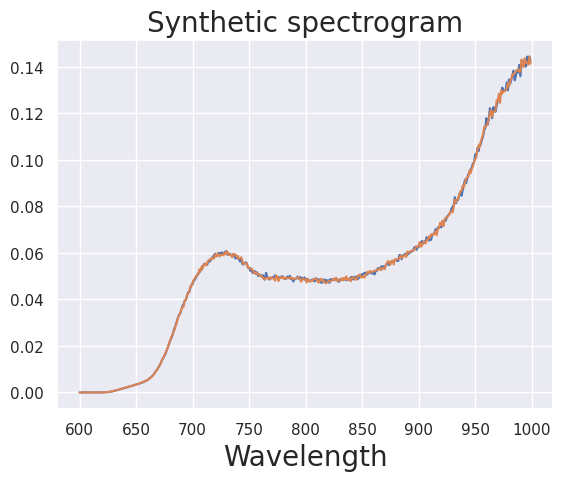

Pred:  [0.5175535  0.26790473 0.07056187 0.05455283 0.02057785 0.06884923]
GT:    [0.52137068 0.26474238 0.06978933 0.05453192 0.02073644 0.06882925]


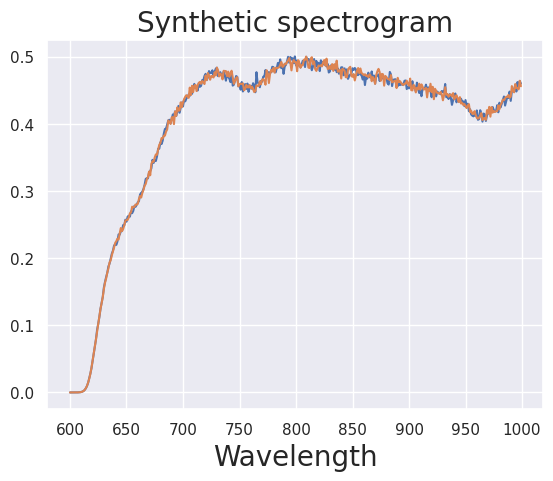

Pred:  [0.25716849 0.2066642  0.3450487  0.14161048 0.04460783 0.00490031]
GT:    [0.25854385 0.20381289 0.34613588 0.14255818 0.04399863 0.00495056]


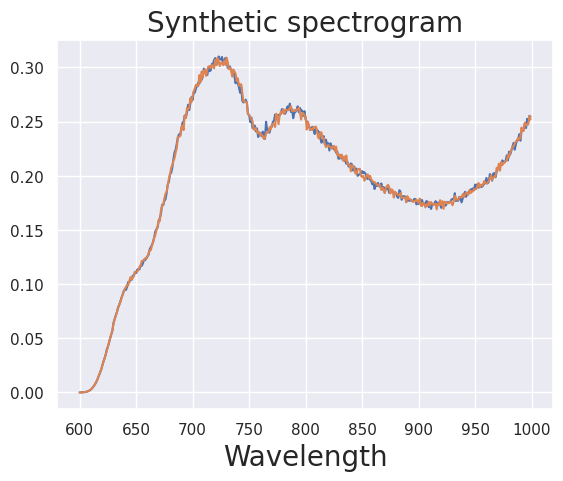

Pred:  [0.25665607 0.33550668 0.0417899  0.07770404 0.18267363 0.10566968]
GT:    [0.26036207 0.33160841 0.04202048 0.07780688 0.18249927 0.1057029 ]


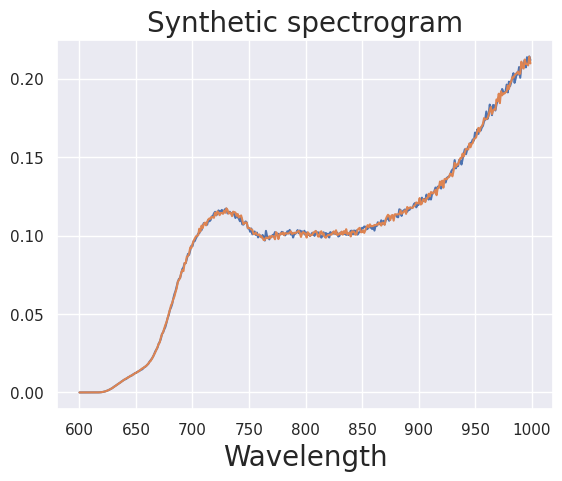

Pred:  [0.24081723 0.18269977 0.12518948 0.0379599  0.1221258  0.29120782]
GT:    [0.24468283 0.17928801 0.12480598 0.03776251 0.1221999  0.29126078]


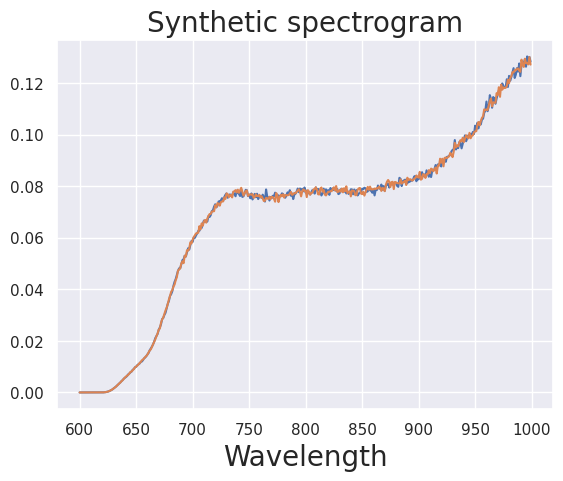

Pred:  [0.34616984 0.08146915 0.23413917 0.01072727 0.19851631 0.12897825]
GT:    [0.35074321 0.07730948 0.23368241 0.01072895 0.19864763 0.12888832]


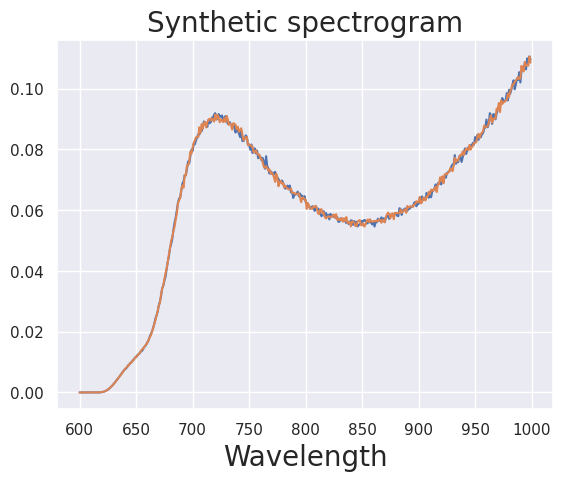

Pred:  [0.15529026 0.09168944 0.08557195 0.28041048 0.28799258 0.0990453 ]
GT:    [0.15102154 0.09586169 0.08606017 0.27984983 0.28809719 0.09910957]


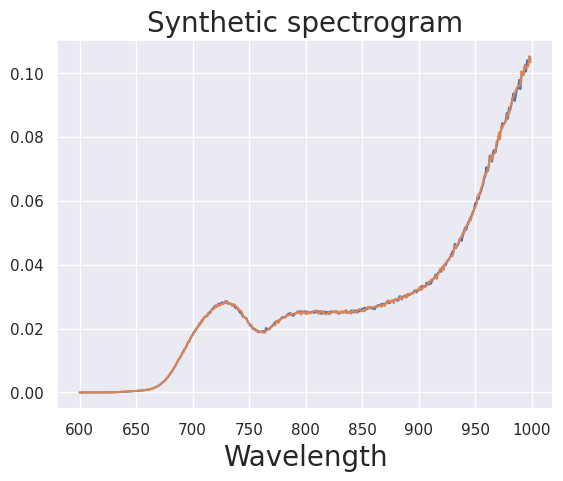

Pred:  [0.30713074 0.05424819 0.27690716 0.13814594 0.06490603 0.15866194]
GT:    [0.30193349 0.05920416 0.27675046 0.13868574 0.06490721 0.15851895]


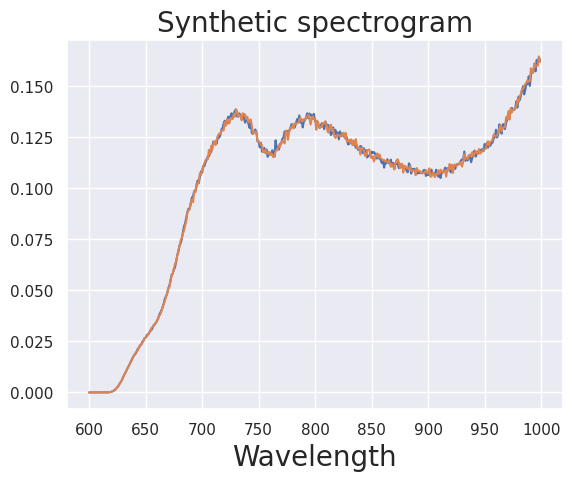

Pred:  [0.02360788 0.03561157 0.00281045 0.2224828  0.24728397 0.46820332]
GT:    [0.01912625 0.0397561  0.00301237 0.22266071 0.24725347 0.4681911 ]


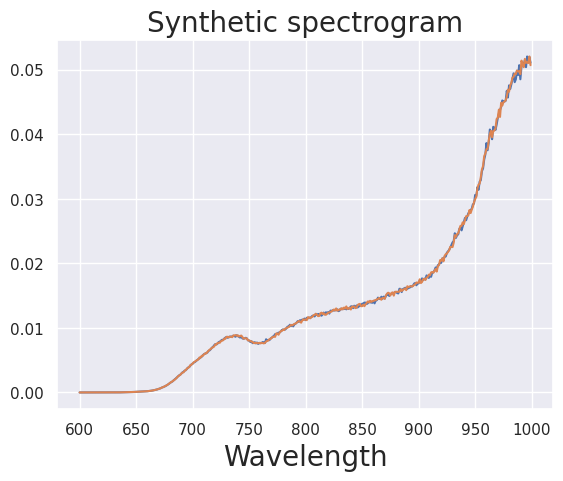

Pred:  [0.00297041 0.50283914 0.09713726 0.16126105 0.18869814 0.04709401]
GT:    [0.01048816 0.49623936 0.09599493 0.16132427 0.18887657 0.0470767 ]


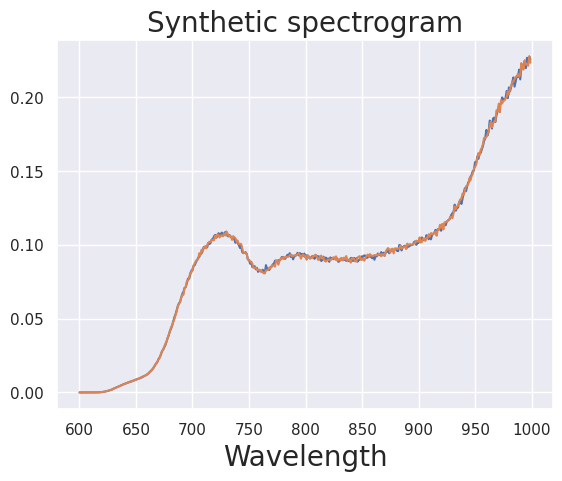

Pred:  [0.28250665 0.09044207 0.08479178 0.18698511 0.03944633 0.31582805]
GT:    [0.28544606 0.08682095 0.08522481 0.18764356 0.03903806 0.31582656]


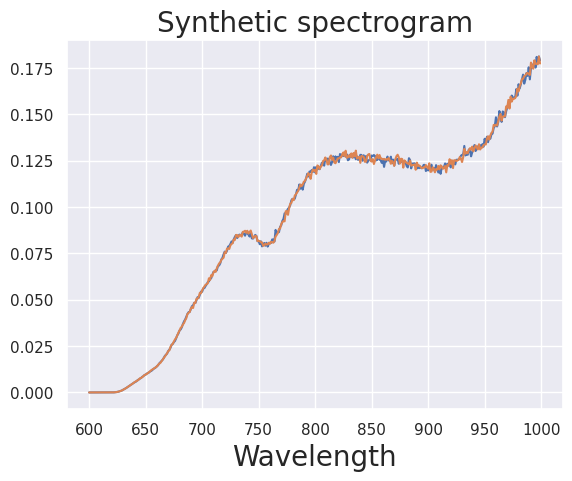

Pred:  [0.00473692 0.06088131 0.04374388 0.26133635 0.35359368 0.27570787]
GT:    [0.00571072 0.06092847 0.04286124 0.26091445 0.35387555 0.27570958]


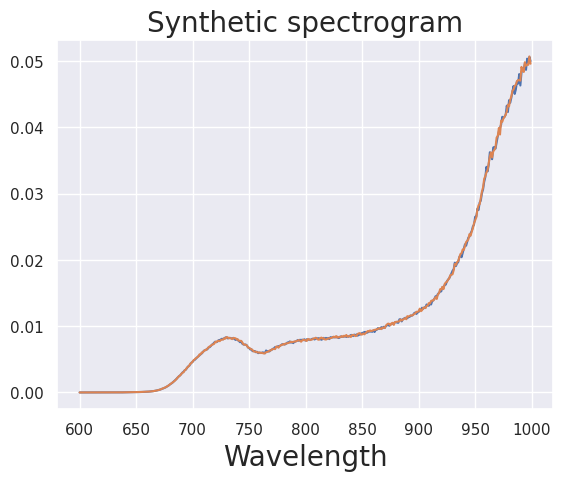

Pred:  [0.19827928 0.33117203 0.10197252 0.23370478 0.12142971 0.01344168]
GT:    [0.19672845 0.33314292 0.10184109 0.23310084 0.12159996 0.01358674]


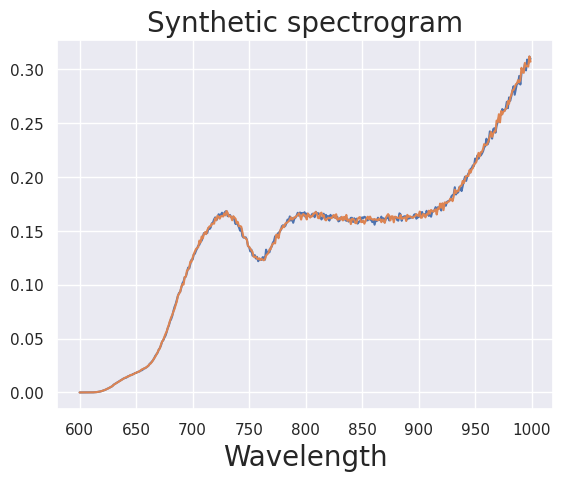

Pred:  [0.10150177 0.30996628 0.13703209 0.19557112 0.18320003 0.07272871]
GT:    [0.10005458 0.31190234 0.13659708 0.19534742 0.18338301 0.07271556]


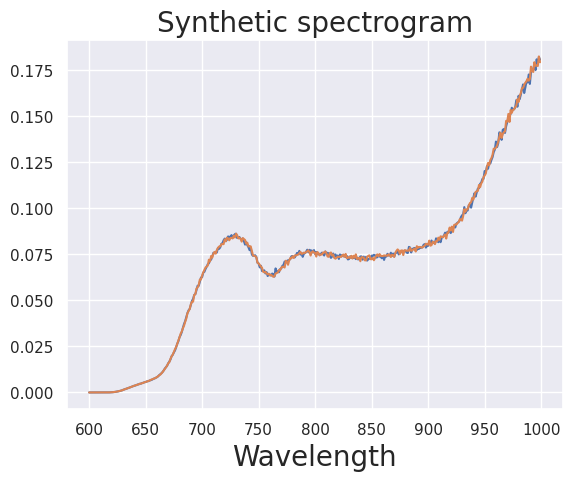

Pred:  [0.74034888 0.05560469 0.05731672 0.09610385 0.03866729 0.01195858]
GT:    [0.73530871 0.06024434 0.05758582 0.09637612 0.03859657 0.01188844]


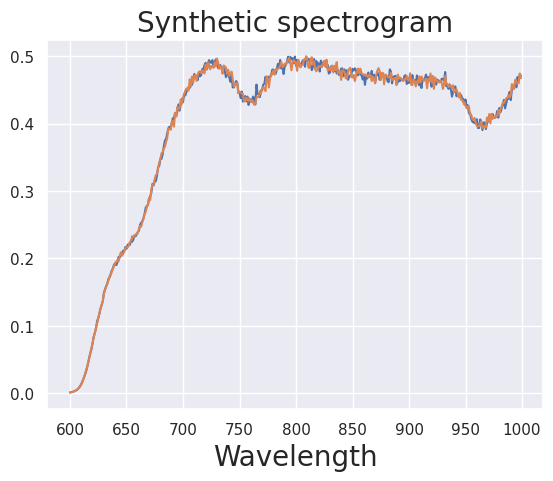

Pred:  [0.05023391 0.0150141  0.04314093 0.27131309 0.1537061  0.46659187]
GT:    [0.04911543 0.0162122  0.04307241 0.2712312  0.15379917 0.46656959]


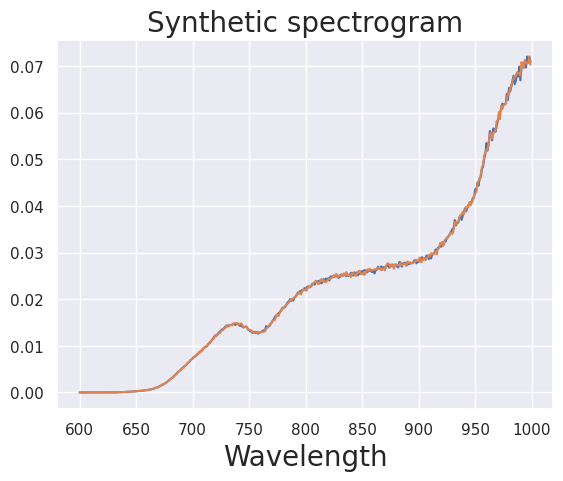

Pred:  [0.56471273 0.11007998 0.01105455 0.04675707 0.19859783 0.06879784]
GT:    [0.55756541 0.11715713 0.01121801 0.04652223 0.19870344 0.0688338 ]


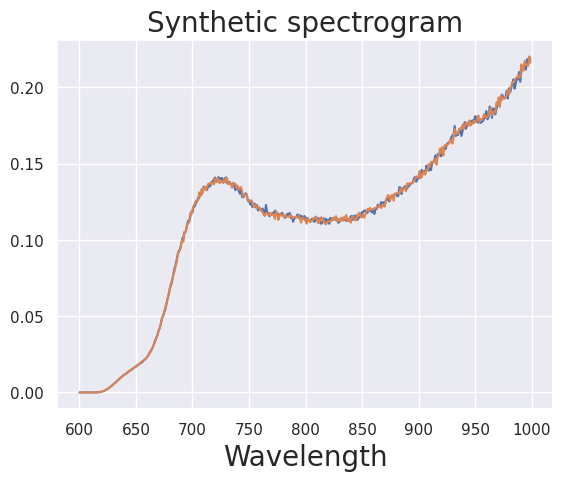

Pred:  [0.35556691 0.08893651 0.02127024 0.32770637 0.15025878 0.05626118]
GT:    [0.35793567 0.08672611 0.02076095 0.32814173 0.15024358 0.05619196]


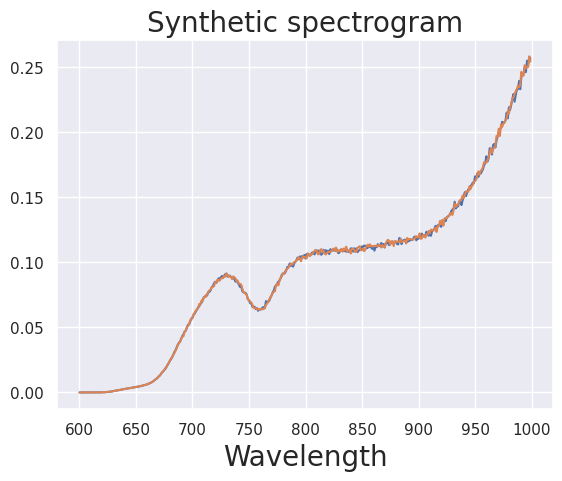

Pred:  [0.14334304 0.48097656 0.20882017 0.12731443 0.02388261 0.01566319]
GT:    [0.14240432 0.48135797 0.20927007 0.12771005 0.02362729 0.0156303 ]


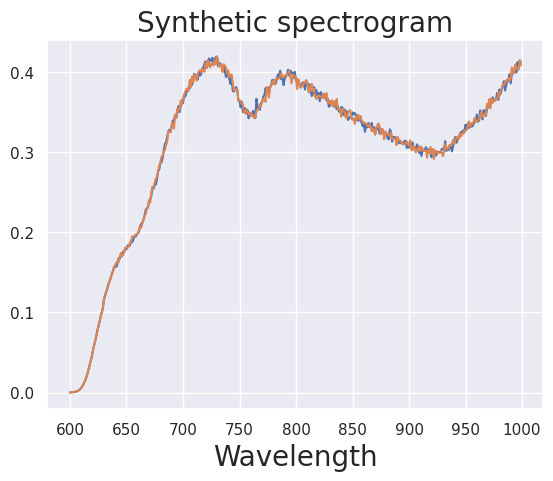

Pred:  [0.16629008 0.01948163 0.27529821 0.08296004 0.22378598 0.23218407]
GT:    [0.1680467  0.01822935 0.27503871 0.08251756 0.2239349  0.23223277]


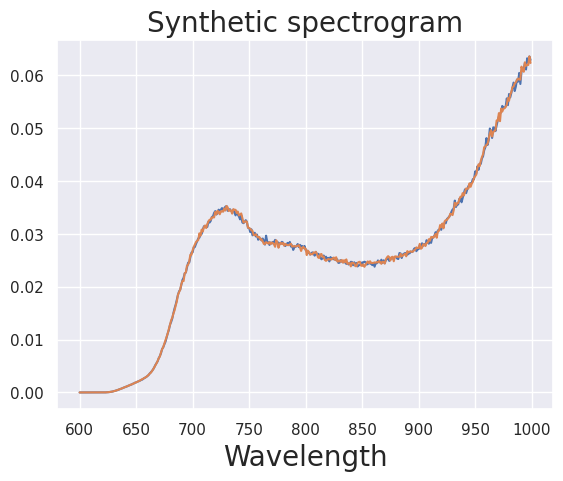

Pred:  [0.10049996 0.07063075 0.01797858 0.11189201 0.28251765 0.41648104]
GT:    [0.09470124 0.07624226 0.01852013 0.11143942 0.28251375 0.41658319]


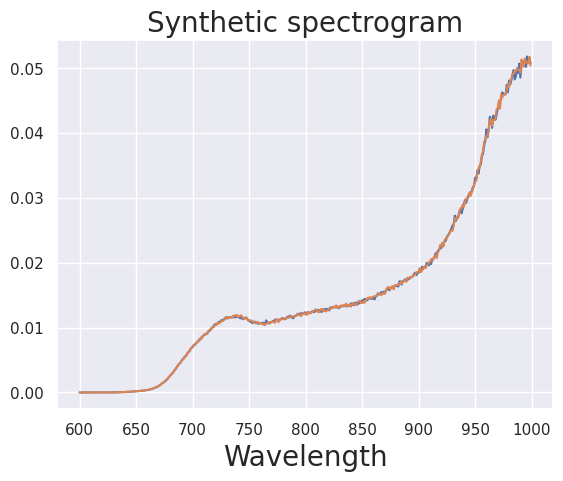

Pred:  [0.02109425 0.62336046 0.13862803 0.09674738 0.0547169  0.06545297]
GT:    [0.02067989 0.62382726 0.13851706 0.0966534  0.05490639 0.065416  ]


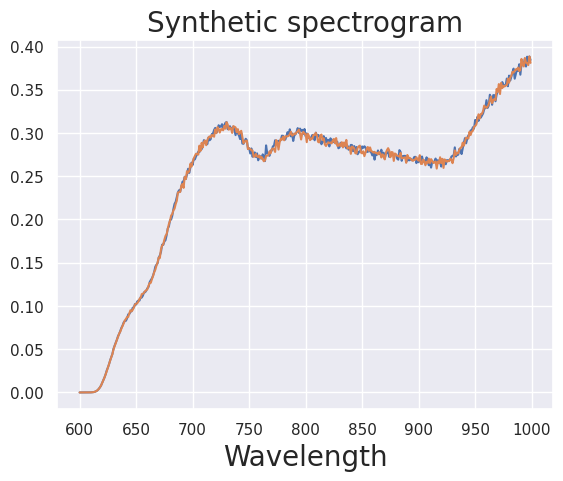

Pred:  [0.25869651 0.052532   0.41544927 0.09285337 0.08844003 0.09202882]
GT:    [0.26574119 0.04676298 0.41420155 0.09230489 0.08887465 0.09211474]


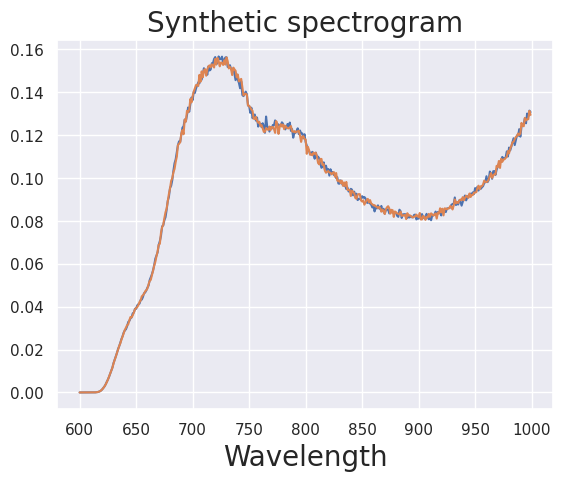

Pred:  [0.20052662 0.01758221 0.47048304 0.12709499 0.02701105 0.15730209]
GT:    [0.19857766 0.01887293 0.47092429 0.12743732 0.02684386 0.15734394]


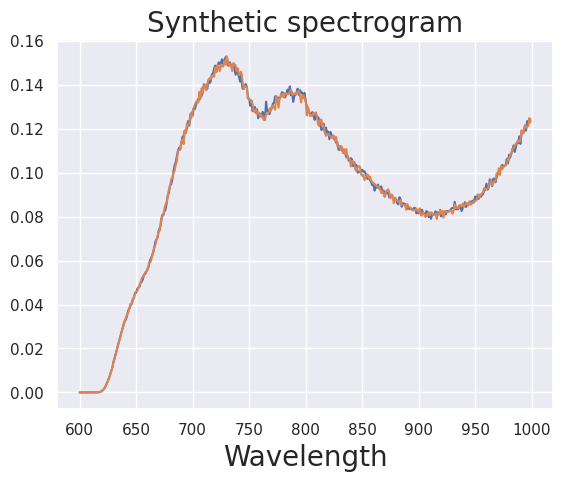

Pred:  [0.34125558 0.42289104 0.11240126 0.02426046 0.07692593 0.02226573]
GT:    [0.33482915 0.42819893 0.11343182 0.02475718 0.07646935 0.02231357]


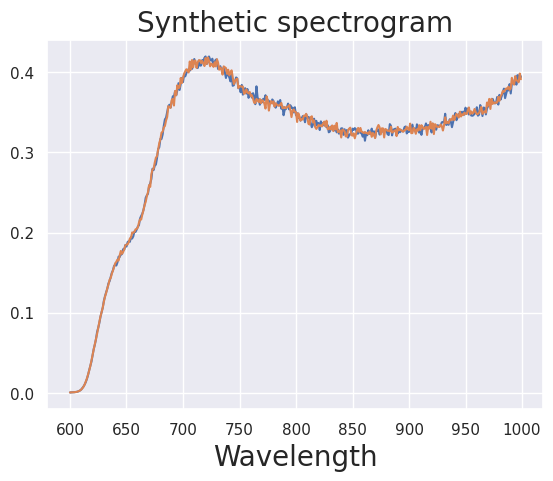

Pred:  [0.0369026  0.1398419  0.46598384 0.02026582 0.09229635 0.24470949]
GT:    [0.03818938 0.1381859  0.46603863 0.02080076 0.09212752 0.24465781]


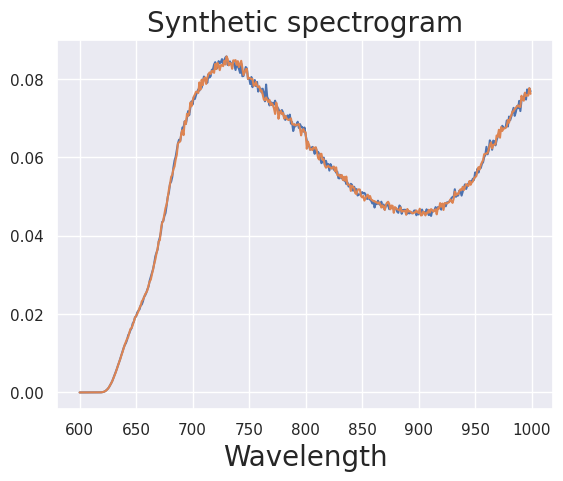

Pred:  [0.00619357 0.33632871 0.16497053 0.02619321 0.44512564 0.02118833]
GT:    [0.00900236 0.33392218 0.16462474 0.02583036 0.44541567 0.02120469]


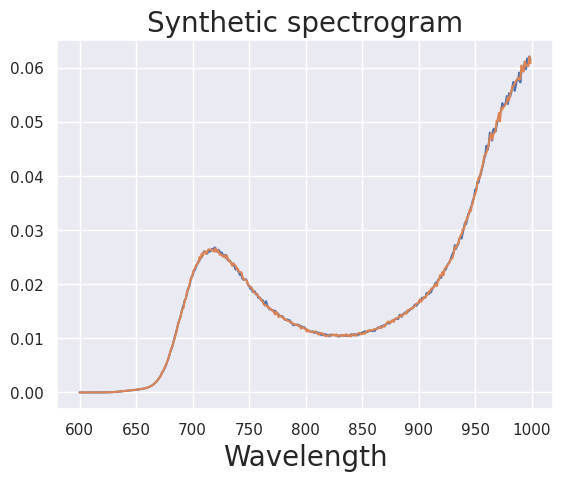

Pred:  [0.22453349 0.22791415 0.15150668 0.167727   0.07094659 0.15737209]
GT:    [0.2220818  0.22917347 0.15237079 0.16857912 0.07044449 0.15735034]


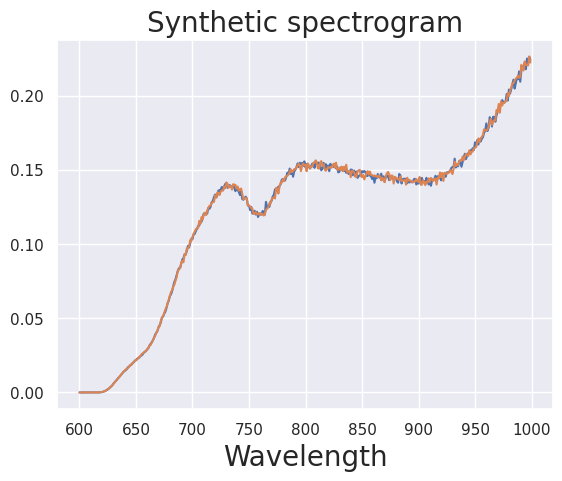

Pred:  [0.13372228 0.27888509 0.0567653  0.11205206 0.05827125 0.36030402]
GT:    [0.14079432 0.27195643 0.05652932 0.11226293 0.05811007 0.36034693]


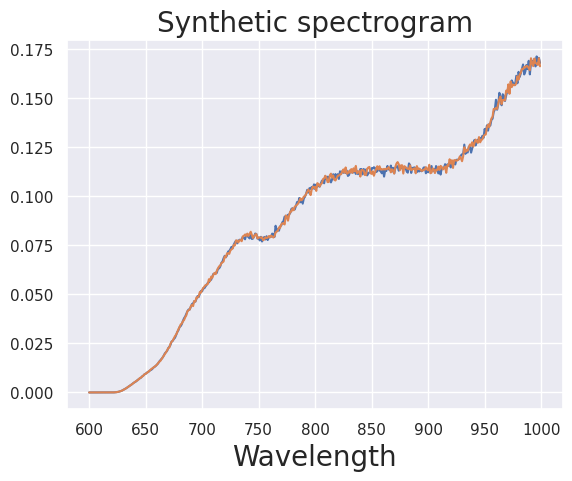

Pred:  [0.01877897 0.30322879 0.14404125 0.1805381  0.21920507 0.13420783]
GT:    [0.0267021  0.2966117  0.14298939 0.17977906 0.21964772 0.13427003]


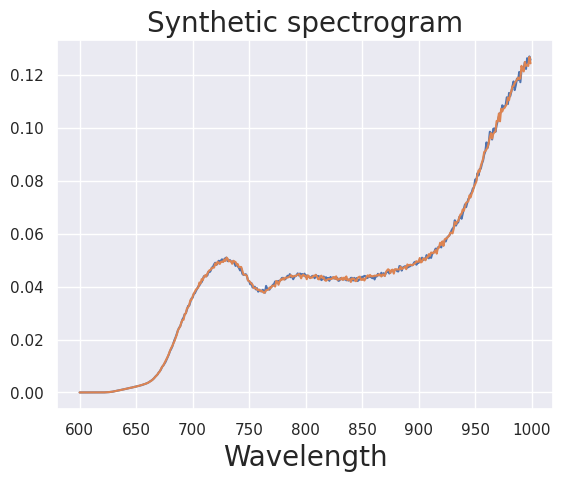

Pred:  [0.09858941 0.48395966 0.12129113 0.06317034 0.11282363 0.12016583]
GT:    [0.1025423  0.480874   0.12066546 0.06262102 0.11305695 0.12024025]


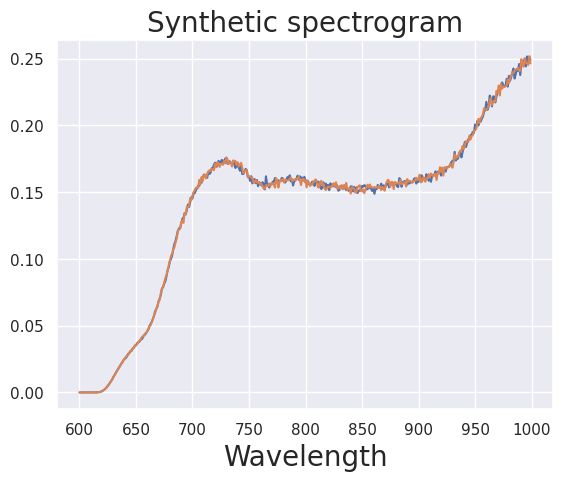

Pred:  [0.0986075  0.02521935 0.13076071 0.36654634 0.30937538 0.06949071]
GT:    [0.09318709 0.03098159 0.13061803 0.36612635 0.30954392 0.06954302]


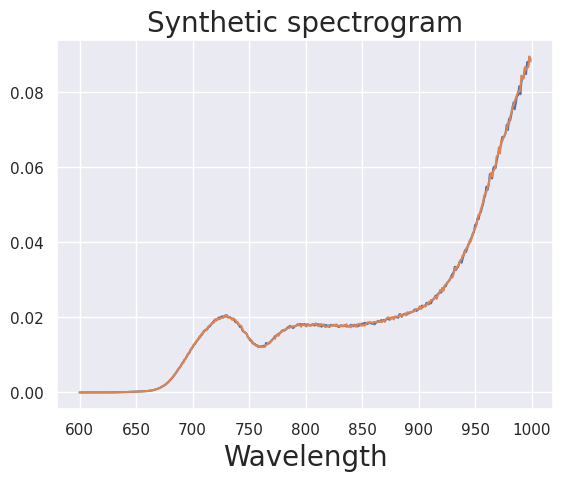

Pred:  [0.01262249 0.3859722  0.1614962  0.05509925 0.12094479 0.26386507]
GT:    [0.00581297 0.3922282  0.16199963 0.05535407 0.12078363 0.26382151]


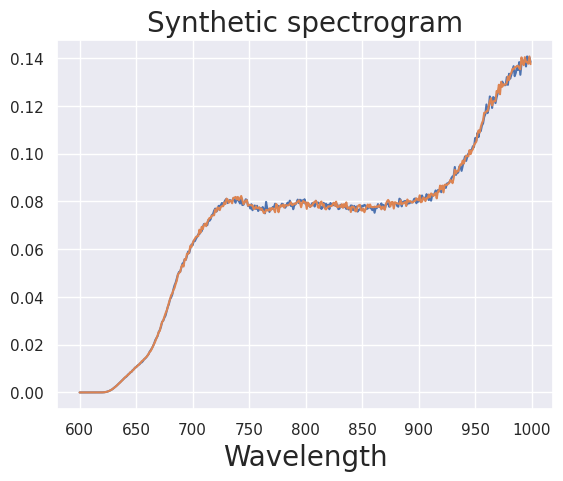

Pred:  [0.22256949 0.27031486 0.04263225 0.10792102 0.01726599 0.33929639]
GT:    [0.22497176 0.26886296 0.04185374 0.10750874 0.01747881 0.339324  ]


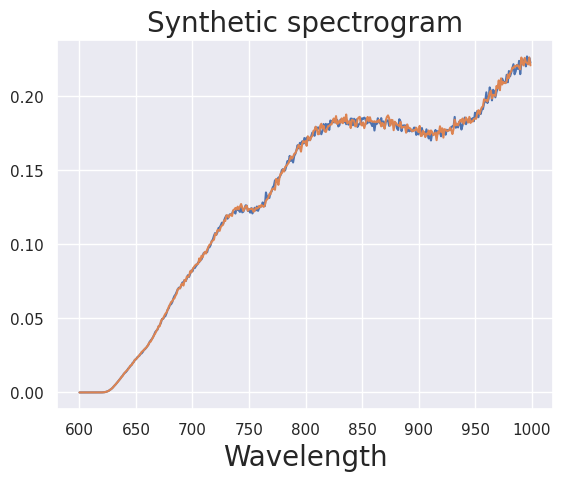

Pred:  [0.33242953 0.23543493 0.01784876 0.08872167 0.12940843 0.19615668]
GT:    [0.32650867 0.24086062 0.01800246 0.08932982 0.12915638 0.19614204]


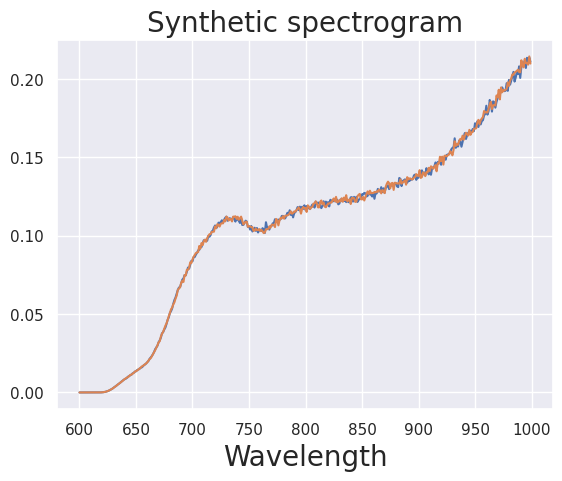

Pred:  [0.15025761 0.32758649 0.01736587 0.12207798 0.16715246 0.21555959]
GT:    [0.15331361 0.32561704 0.01617784 0.1220311  0.16732713 0.21553328]


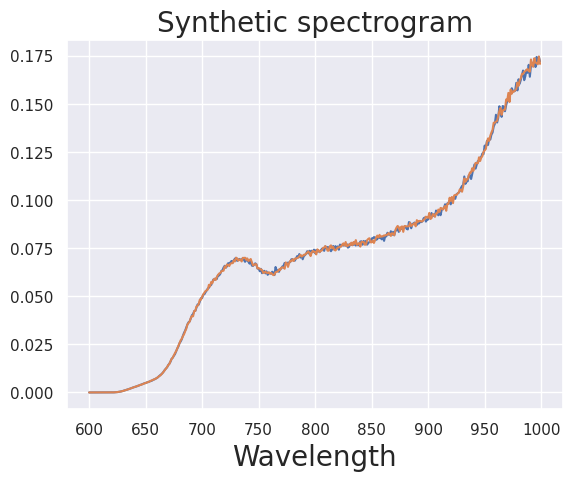

Pred:  [0.0903635  0.2140837  0.17831409 0.36278657 0.14107984 0.01337232]
GT:    [0.09235405 0.2116538  0.17858151 0.36333744 0.14065991 0.01341329]


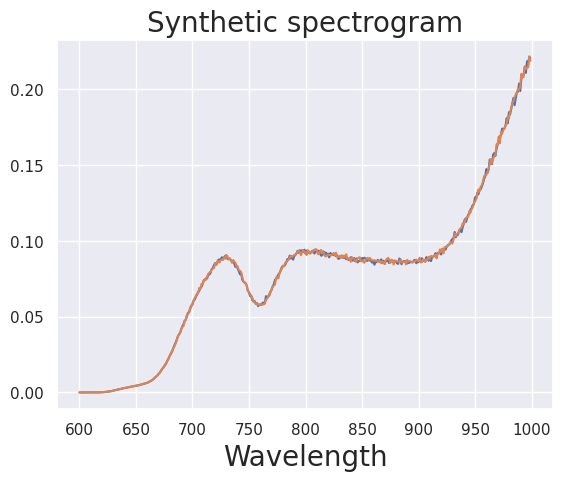

Pred:  [0.06900131 0.28486501 0.16279643 0.02381195 0.11965454 0.33987076]
GT:    [0.06777253 0.28566793 0.16335365 0.02367343 0.1197081  0.33982436]


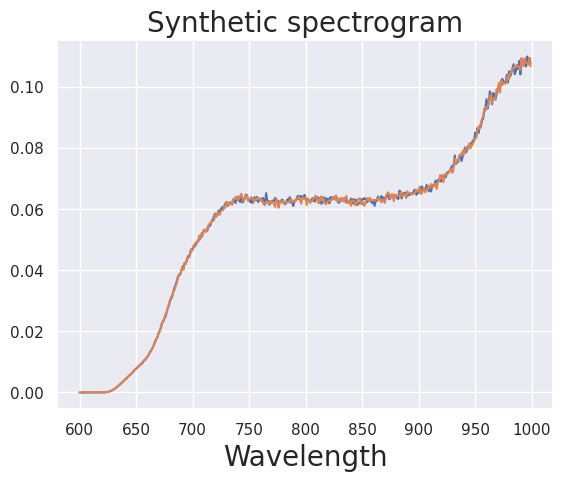

Pred:  [0.15500032 0.14232411 0.0768312  0.21505781 0.15706875 0.2537178 ]
GT:    [0.15708273 0.13938036 0.07746334 0.21561975 0.15688391 0.2535699 ]


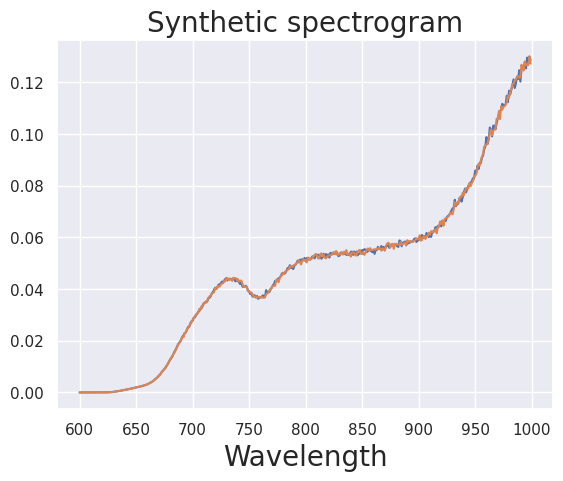

Pred:  [0.25759588 0.2481515  0.2062029  0.19471087 0.00211501 0.09122384]
GT:    [0.25399174 0.2513463  0.20638172 0.19507633 0.00209006 0.09111385]


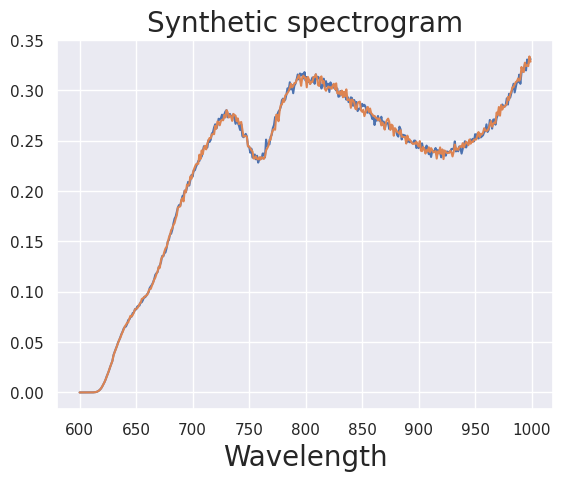

Pred:  [0.03644707 0.02225392 0.00973465 0.34791616 0.15377227 0.42987593]
GT:    [0.0319696  0.02599383 0.0105982  0.34795886 0.15358637 0.42989314]


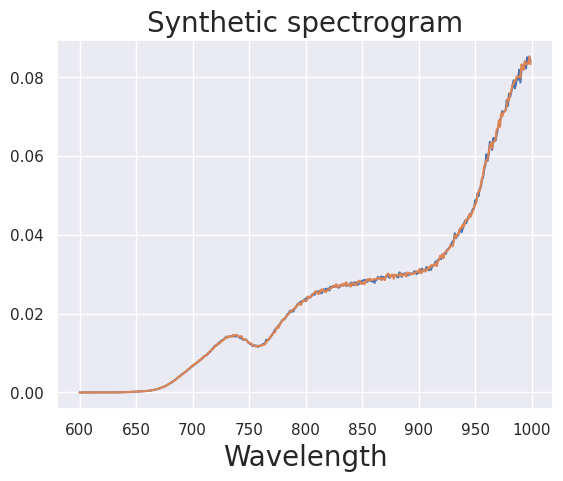

Pred:  [0.16587555 0.34988019 0.01411025 0.11902919 0.04771359 0.30339123]
GT:    [0.17081727 0.34449951 0.0144583  0.11922227 0.04763257 0.30337008]


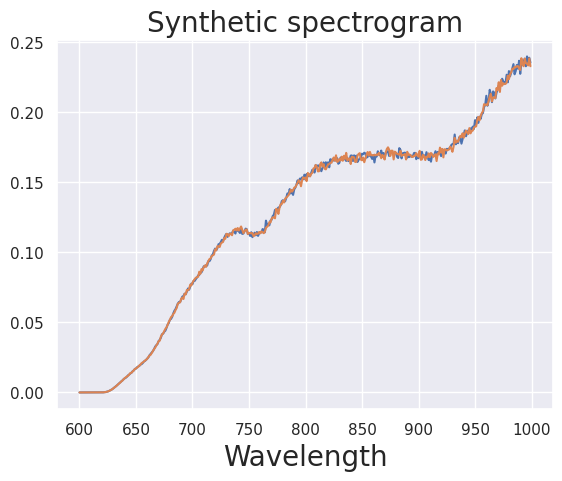

Pred:  [0.09159793 0.27910348 0.0060011  0.04694349 0.45548162 0.12087239]
GT:    [0.09071498 0.28020569 0.00580568 0.04677215 0.45566027 0.12084123]


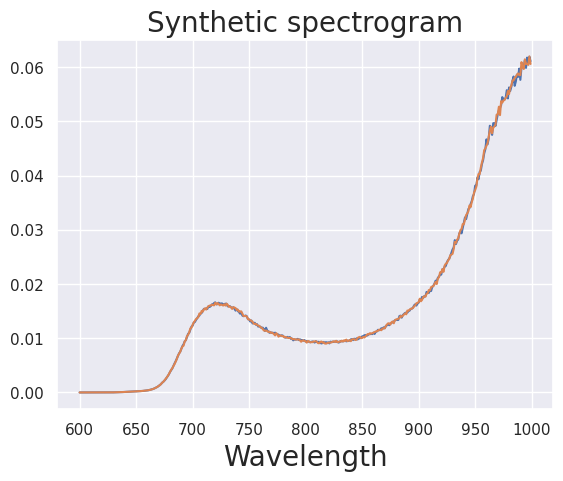

Pred:  [0.27132036 0.09065777 0.04734794 0.09976864 0.09801804 0.39288725]
GT:    [0.27140427 0.09061321 0.04735664 0.09965301 0.09815066 0.39282222]


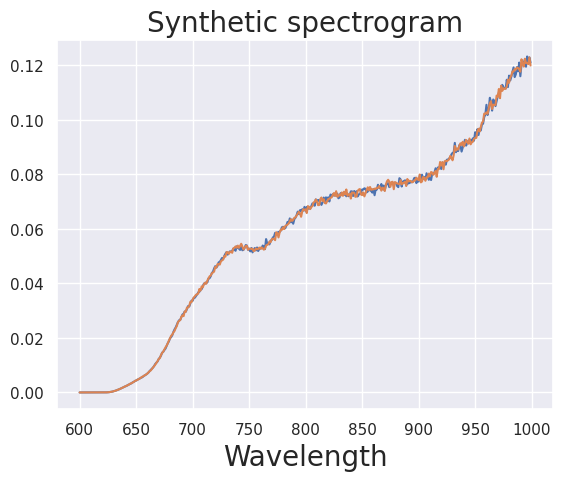

Pred:  [0.01026836 0.20538137 0.18056745 0.21384948 0.01308823 0.37684512]
GT:    [0.01061044 0.20453226 0.18088922 0.21431784 0.01293177 0.37671848]


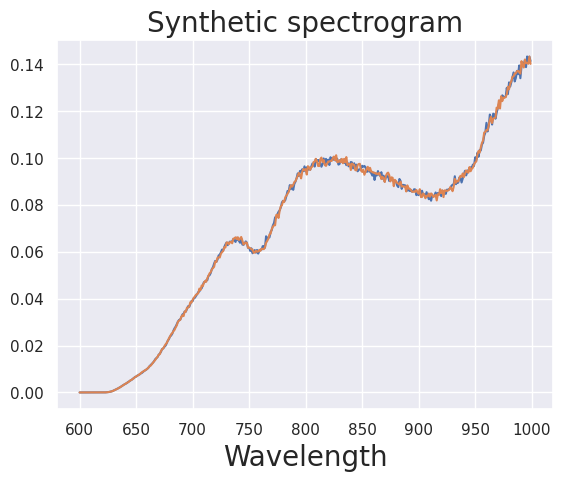

Pred:  [0.01425488 0.57619186 0.01447239 0.06801963 0.24394144 0.0831198 ]
GT:    [0.01783956 0.57200358 0.01483415 0.0686733  0.24352727 0.08312214]


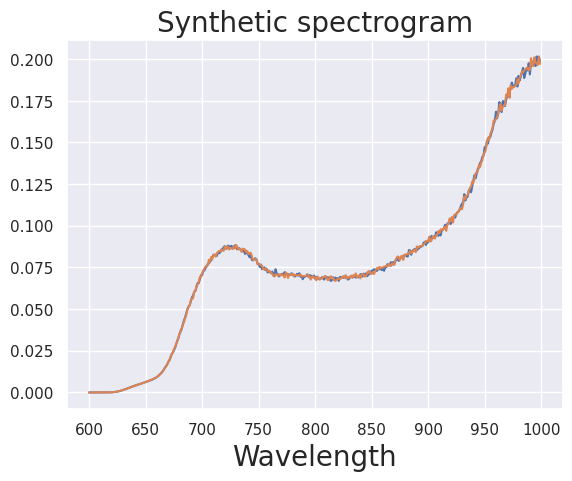

Pred:  [0.01491207 0.19335532 0.42579118 0.09563815 0.10076556 0.16953773]
GT:    [0.0149751  0.19312405 0.42616463 0.09528364 0.10076341 0.16968917]


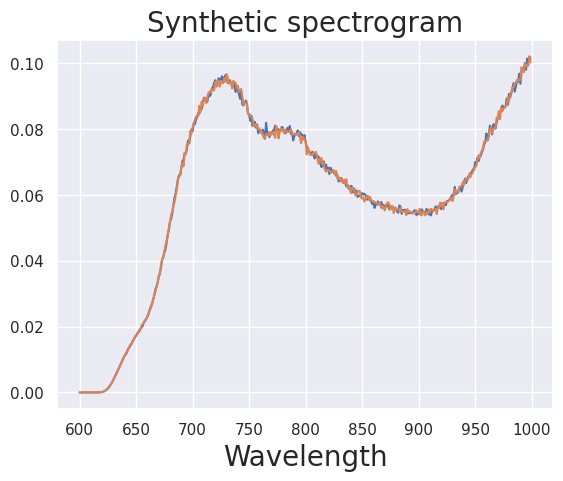

Pred:  [0.03041111 0.26292163 0.00363999 0.44584501 0.05960713 0.19757514]
GT:    [0.03140999 0.26127196 0.00391815 0.44641726 0.05948208 0.19750057]


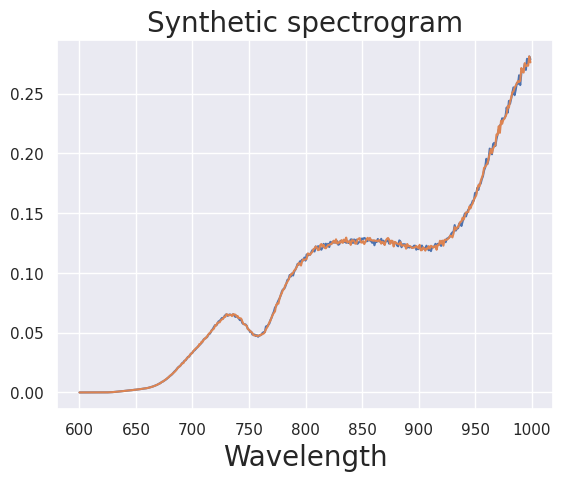

Pred:  [0.044833   0.02107093 0.28909294 0.31511553 0.02509493 0.30479267]
GT:    [0.04784376 0.01805504 0.28899973 0.31528058 0.02494566 0.30487523]


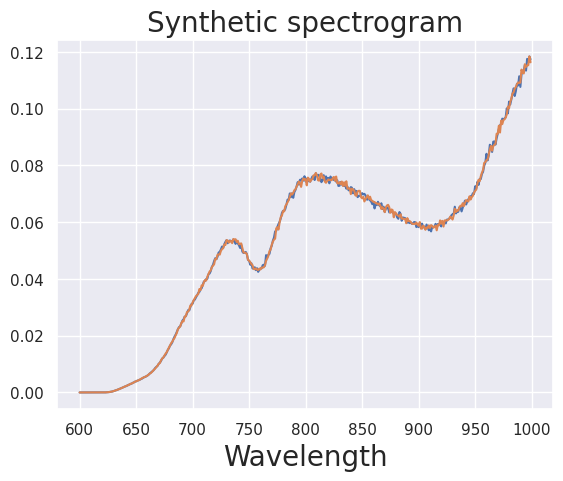

Pred:  [0.06278476 0.00540161 0.0972602  0.26038089 0.25683144 0.3173411 ]
GT:    [0.06340866 0.00473248 0.09724449 0.26049139 0.25676051 0.31736247]


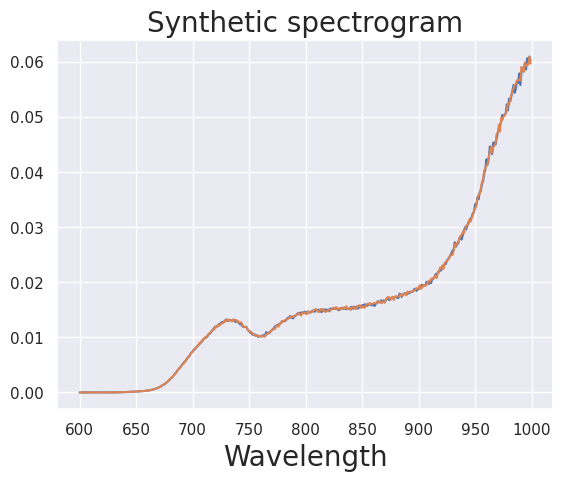

Pred:  [0.0306661  0.02805051 0.17778751 0.16098259 0.02784965 0.57466364]
GT:    [0.02406261 0.03430781 0.17794964 0.16136394 0.02764682 0.57466918]


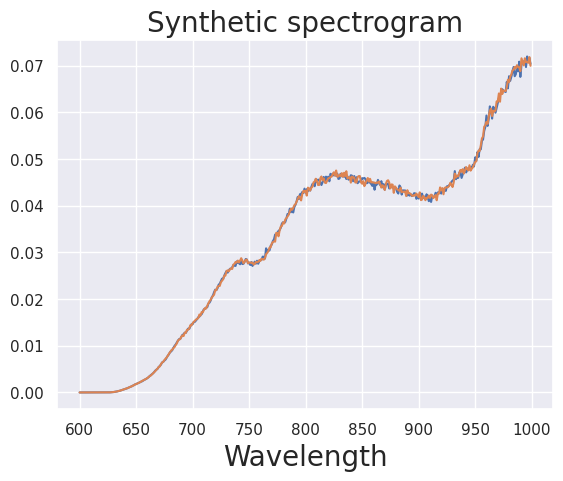

Pred:  [0.07240427 0.08890466 0.16484379 0.3808444  0.05749722 0.23550566]
GT:    [0.06932517 0.09232728 0.16484305 0.38023588 0.05769896 0.23556967]


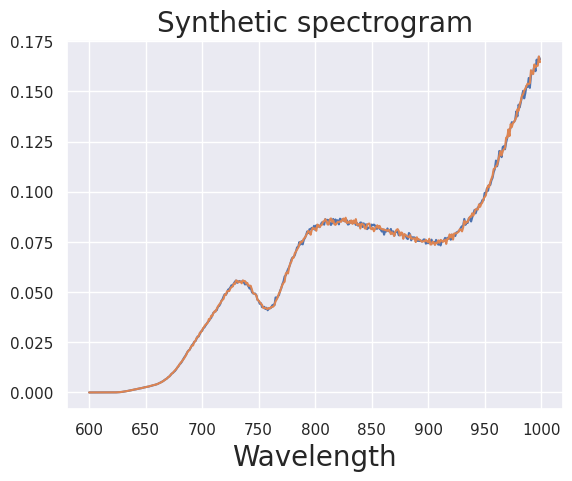

Pred:  [0.01790942 0.09666327 0.23635107 0.26813362 0.17532561 0.205617  ]
GT:    [0.01531741 0.09756309 0.23751676 0.26935103 0.17460566 0.20564604]


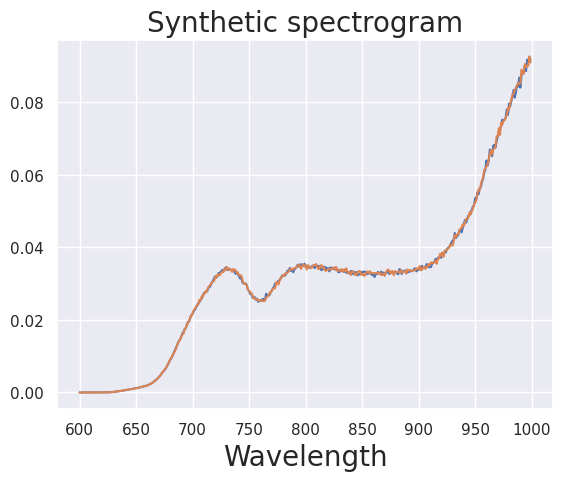

Pred:  [0.2995222  0.41656271 0.06824383 0.02288713 0.03851337 0.15427076]
GT:    [0.29441193 0.42170022 0.06851141 0.022645   0.03840924 0.15432219]


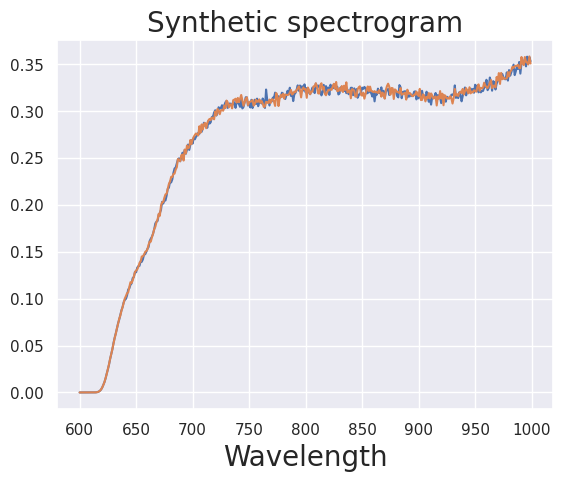

Pred:  [0.14843813 0.03897314 0.20946549 0.01903739 0.44693742 0.13714842]
GT:    [0.15599699 0.03276353 0.20852517 0.01807945 0.4473959  0.13723896]


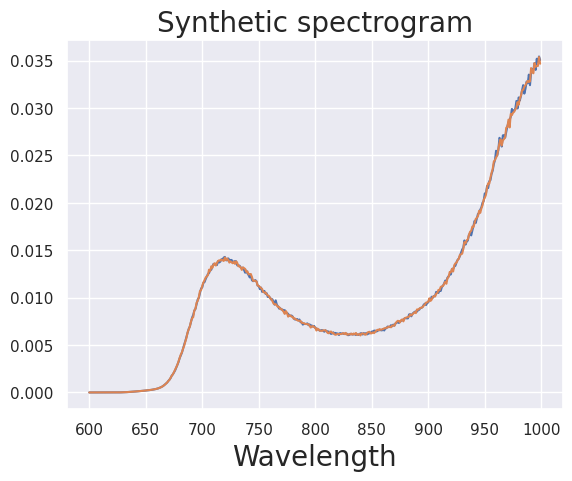

Pred:  [0.16246033 0.21294149 0.02828558 0.0636924  0.42568293 0.10693727]
GT:    [0.15814463 0.21705207 0.02866666 0.06362713 0.42556966 0.10693984]


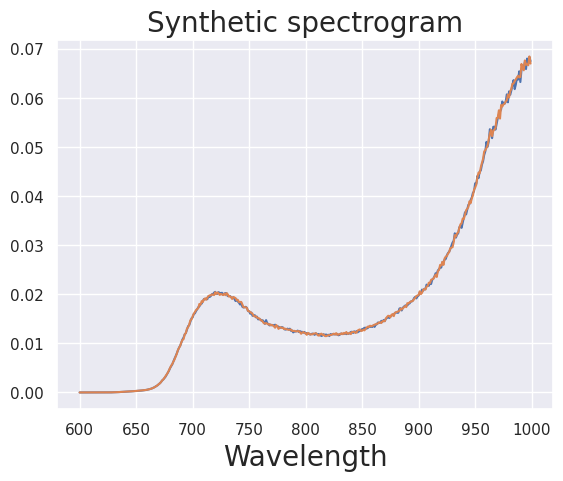

Pred:  [0.17469834 0.12788569 0.26888498 0.08904407 0.11347739 0.22600955]
GT:    [0.16795602 0.13546614 0.26847737 0.08829421 0.1137486  0.22605767]


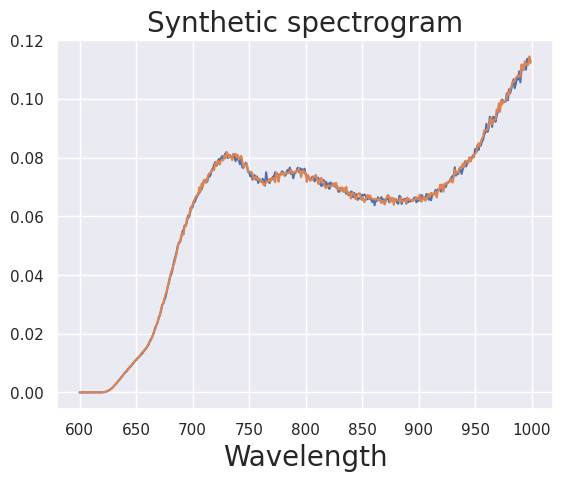

Pred:  [0.38444131 0.00594163 0.19975025 0.18646125 0.11908339 0.10432216]
GT:    [0.38342569 0.00574631 0.20056325 0.18727894 0.11864524 0.10434058]


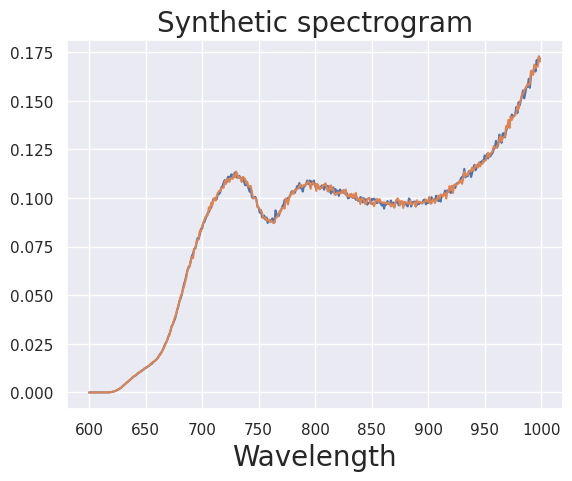

Pred:  [0.1570857  0.01789884 0.00830994 0.04811682 0.64244099 0.12614771]
GT:    [0.15568943 0.01919572 0.00865121 0.04771079 0.64253574 0.1262171 ]


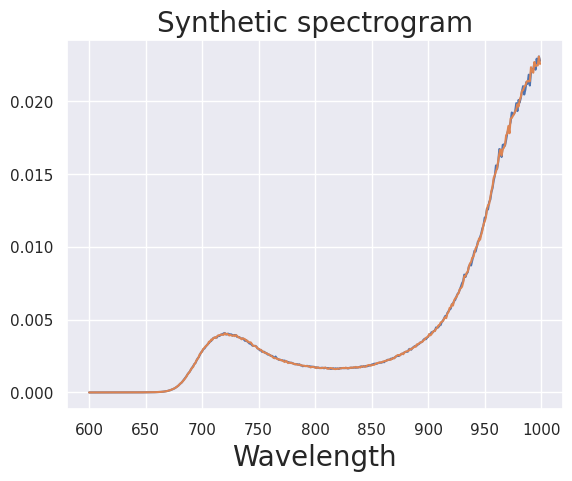

Pred:  [0.02084076 0.44302306 0.29628118 0.00224364 0.22839787 0.00921348]
GT:    [0.02120794 0.4415398  0.29685898 0.00328995 0.22794509 0.00915823]


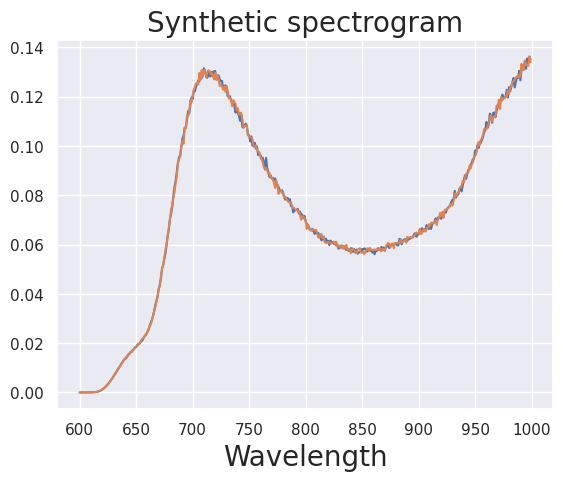

Pred:  [0.07770684 0.00950297 0.10021621 0.48869313 0.29998899 0.02389188]
GT:    [0.06791732 0.01896272 0.10048726 0.48877509 0.30002825 0.02382935]


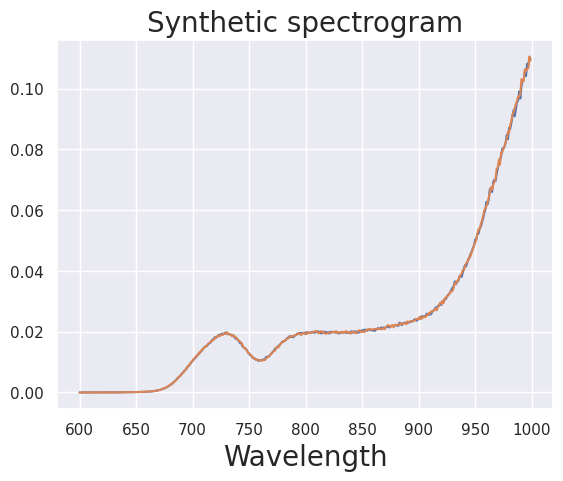

Pred:  [0.22542973 0.16209738 0.18657953 0.10542445 0.28557541 0.0348935 ]
GT:    [0.22310664 0.1641992  0.18680615 0.10552942 0.28546839 0.0348902 ]


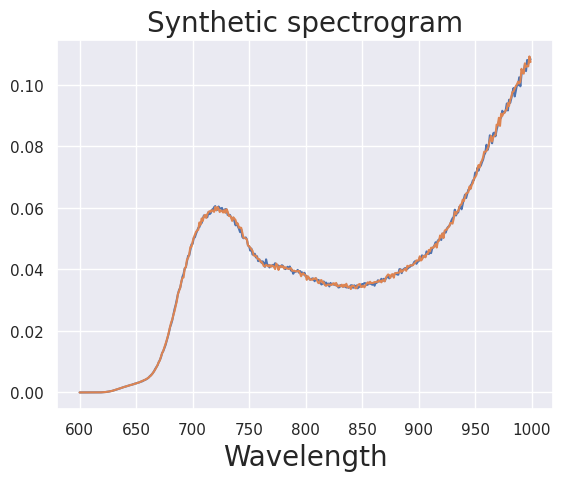

Pred:  [0.09846295 0.07194913 0.5070156  0.00153891 0.22887436 0.09215905]
GT:    [0.09059873 0.07848123 0.50807363 0.00227974 0.2285165  0.09205016]


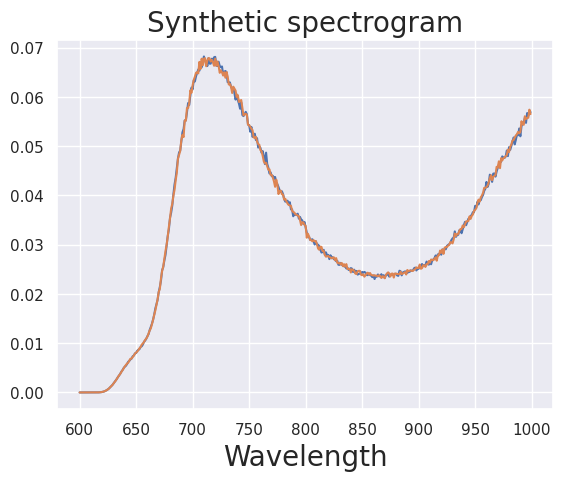

Pred:  [0.04259863 0.16581758 0.22105187 0.16221644 0.28554359 0.12277189]
GT:    [0.04182985 0.16643097 0.22116854 0.16238608 0.28537878 0.12280578]


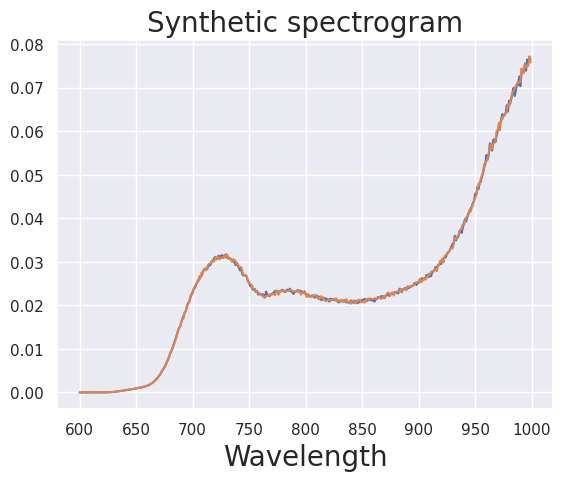

Pred:  [0.01161097 0.23089533 0.14874536 0.53251634 0.01036228 0.06586971]
GT:    [0.01313922 0.23027645 0.14774077 0.53239328 0.01065709 0.06579318]


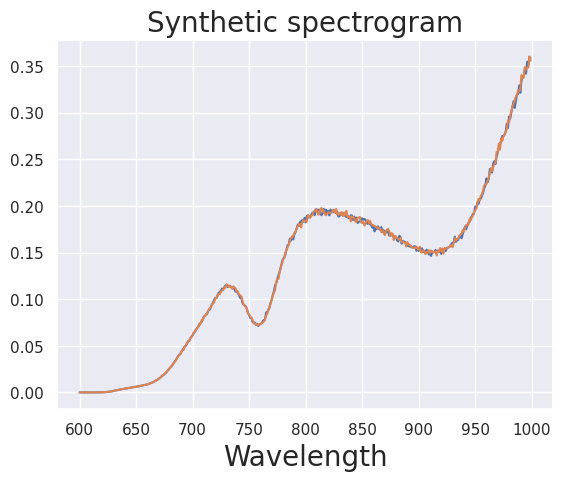

Pred:  [0.17198391 0.10028807 0.13488022 0.45785074 0.04555983 0.08943723]
GT:    [0.17015493 0.10171012 0.13525309 0.45794601 0.04548136 0.08945449]


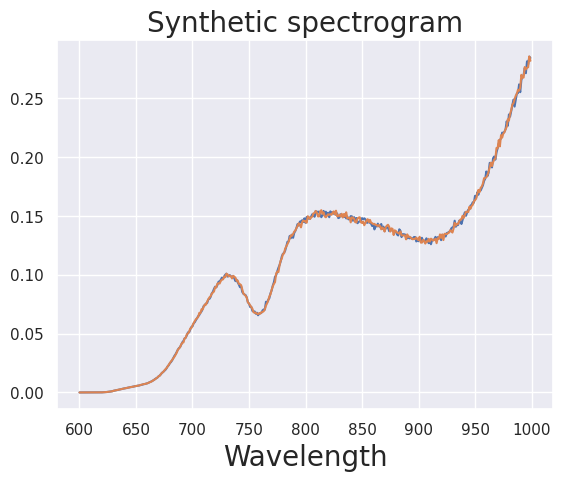

Pred:  [0.0517377  0.00959613 0.33001466 0.54149659 0.03163003 0.03552489]
GT:    [0.04760984 0.01479337 0.32928168 0.5407096  0.0320726  0.03553291]


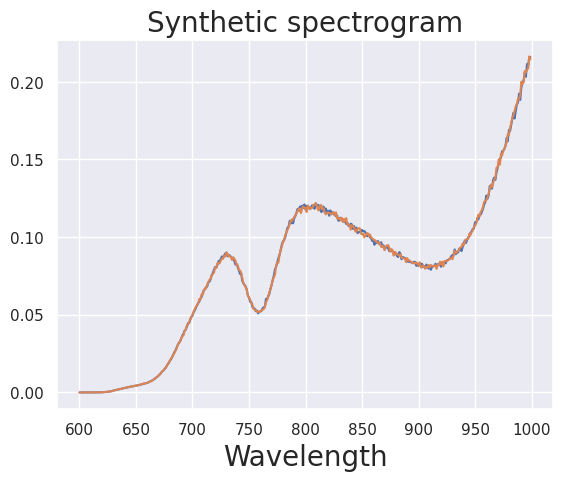

Pred:  [0.23387781 0.05995601 0.07107515 0.09481285 0.00872451 0.53155368]
GT:    [0.23163586 0.06182978 0.07115504 0.09529309 0.00860192 0.53148432]


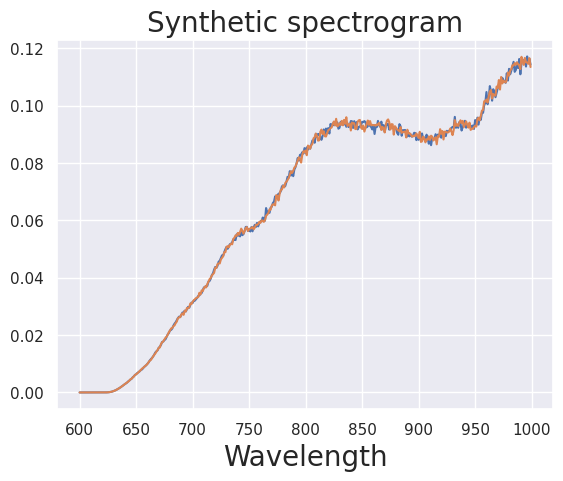

Pred:  [0.01598018 0.43044382 0.19794999 0.20432938 0.03317951 0.11811713]
GT:    [0.01247972 0.43401309 0.19836046 0.20374448 0.03318695 0.11821529]


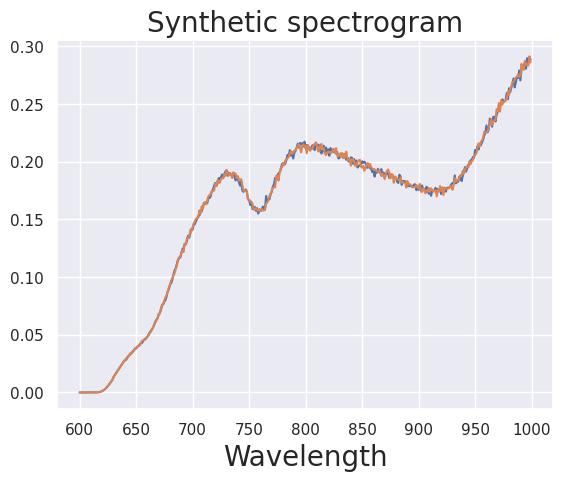

Pred:  [0.23415412 0.0092635  0.35619142 0.26588765 0.07894744 0.05555586]
GT:    [0.240203   0.00311595 0.35628722 0.26598745 0.0788702  0.05553619]


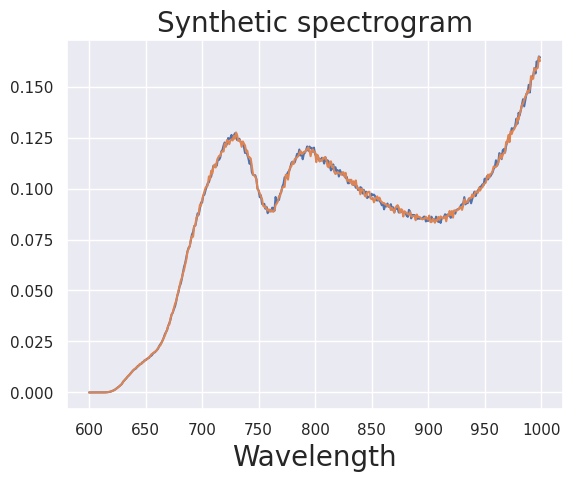

Pred:  [0.29980475 0.07264803 0.04251886 0.13956432 0.23336552 0.21209852]
GT:    [0.30508851 0.06707857 0.04257233 0.14001657 0.23328323 0.21196079]


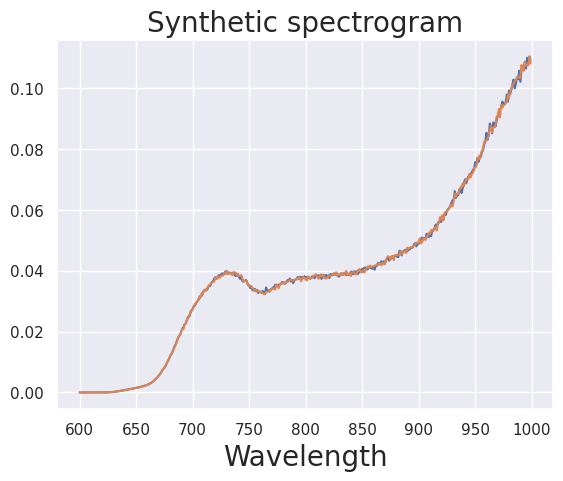

Pred:  [0.10394616 0.04428081 0.53621674 0.00155858 0.07111467 0.24288303]
GT:    [0.10546979 0.04238532 0.53615341 0.00235921 0.07093583 0.24269643]


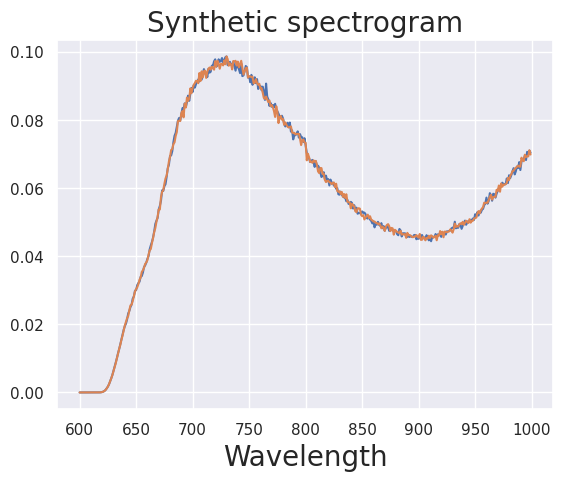

Pred:  [0.2755358  0.02530757 0.40157221 0.19376186 0.1027536  0.00106895]
GT:    [0.28124911 0.01921232 0.40154007 0.19445806 0.10253536 0.00100508]


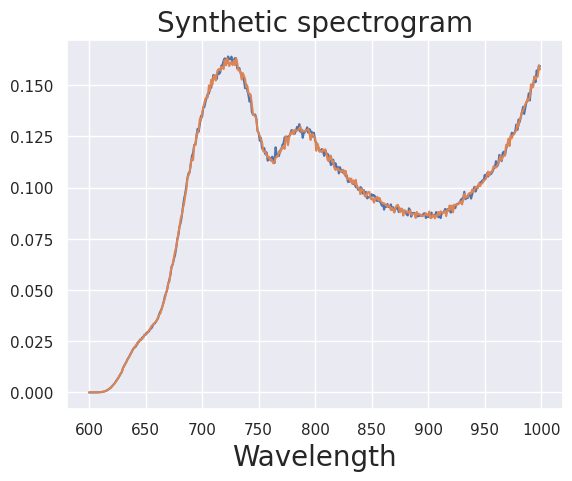

Pred:  [0.14221505 0.03080276 0.01629871 0.3948891  0.10057604 0.31521835]
GT:    [0.14632562 0.02753638 0.01576569 0.3941214  0.10091881 0.3153321 ]


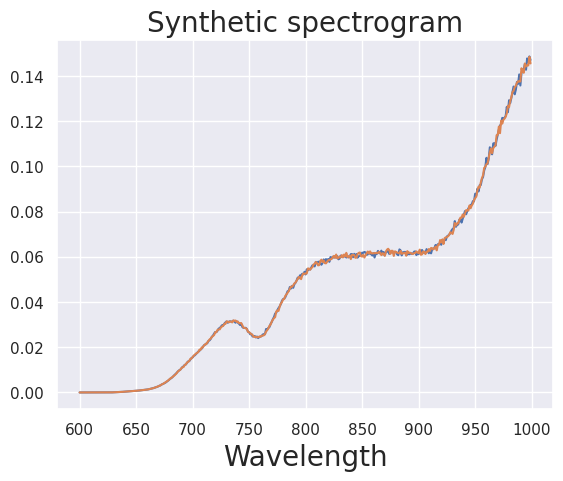

Pred:  [0.02138437 0.11476479 0.02193565 0.20266296 0.20796062 0.43129161]
GT:    [0.02666782 0.10940875 0.02196653 0.20280301 0.20772547 0.43142841]


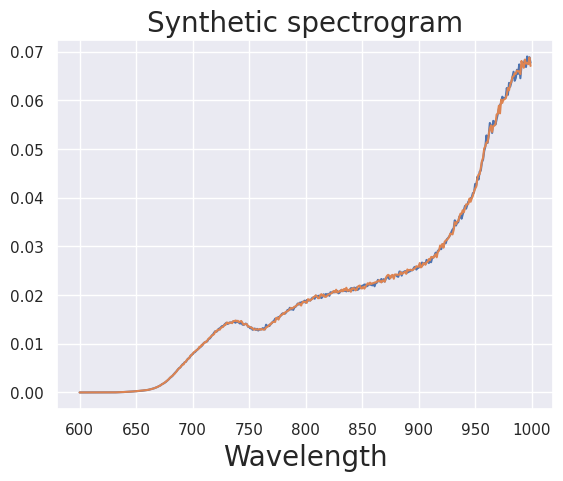

Pred:  [0.0504087  0.00482949 0.48073138 0.03134825 0.18691798 0.2457642 ]
GT:    [0.04744426 0.00785205 0.48050174 0.03165817 0.18686551 0.24567827]


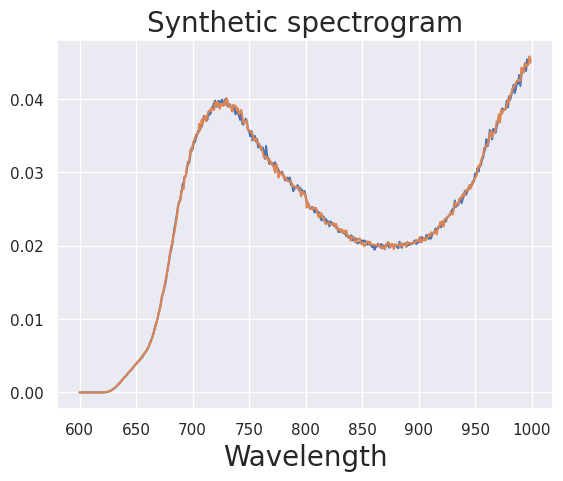

Pred:  [0.25762501 0.05736904 0.58320404 0.03475352 0.02971073 0.03733766]
GT:    [0.26265354 0.05329923 0.58225145 0.03452502 0.02989371 0.03737705]


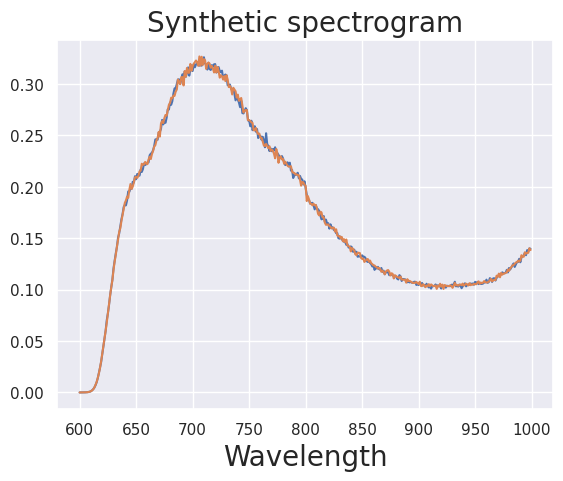

Pred:  [0.01197249 0.39248186 0.07717044 0.21118537 0.03548571 0.27170413]
GT:    [0.01413522 0.39076322 0.07662675 0.21119383 0.03548375 0.27179723]


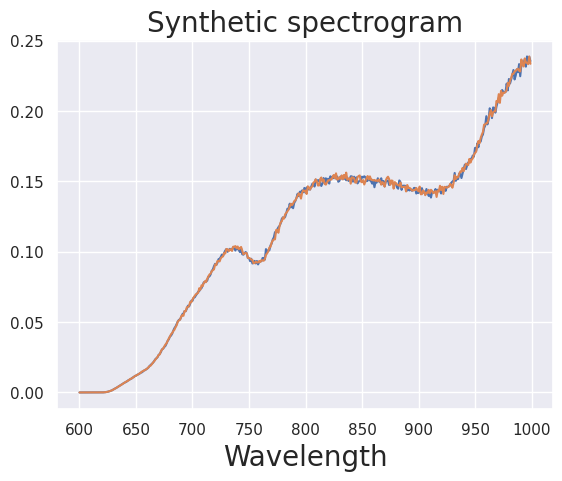

Pred:  [0.12868145 0.0657614  0.15852288 0.12336841 0.28992673 0.23373912]
GT:    [0.12749834 0.06695256 0.15844996 0.12342017 0.28999403 0.23368493]


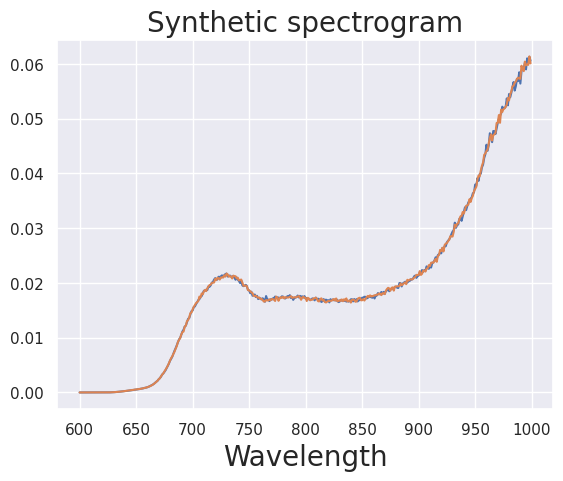

Pred:  [0.08488092 0.05522461 0.25433124 0.2331619  0.00175772 0.37064362]
GT:    [0.08254332 0.05811403 0.25393248 0.23275834 0.00198541 0.37066642]


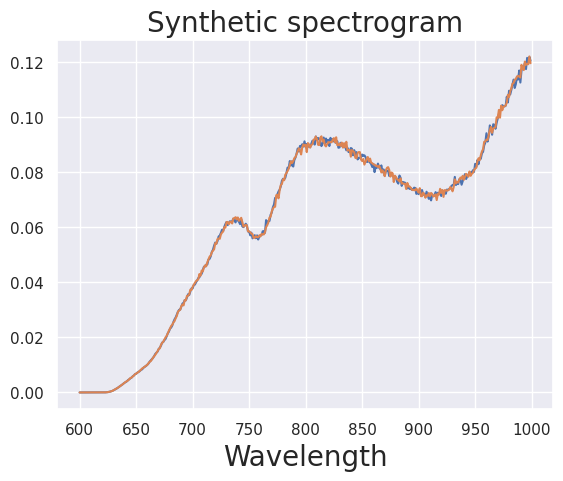

Pred:  [0.05710649 0.05372481 0.1481433  0.04486699 0.40274865 0.29340976]
GT:    [0.06282509 0.0478756  0.14787591 0.04563278 0.40246471 0.2933259 ]


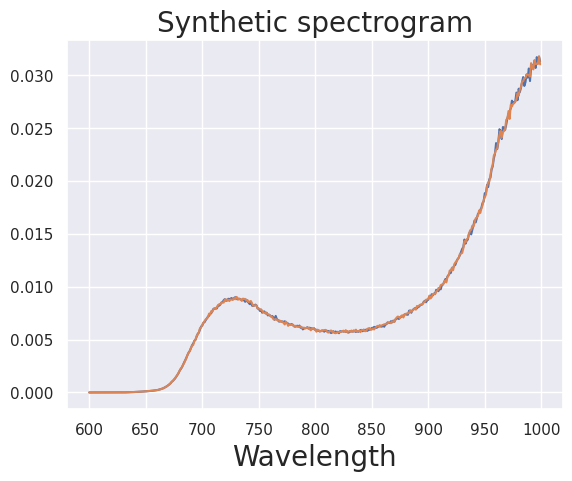

Pred:  [0.03918819 0.55513556 0.11511783 0.08476472 0.13754023 0.06825348]
GT:    [0.04556275 0.54886419 0.11469215 0.08521435 0.13746118 0.06820538]


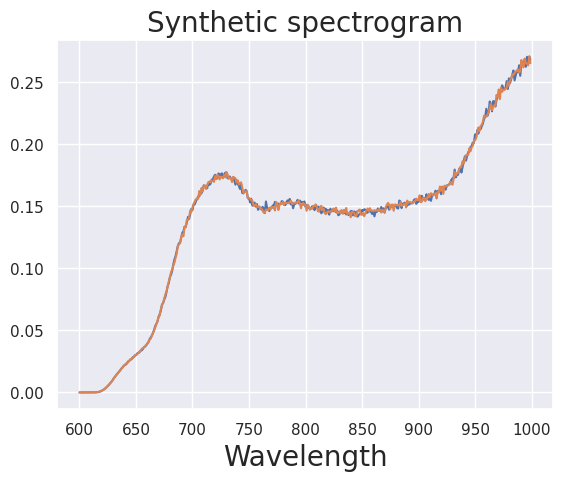

In [160]:
import cvxpy as cp
import numpy as np

spect_error = []
param_error = []
n_chromophores = 6

# loop over all spectra we generated and see how accurate it is
for i in range(number_of_samples):
    # Problem data.
    n = len(synth_spect_dataset[n_chromophores-2][i]) # number of wavelength
    m = len(synth_spect_params[n_chromophores-2][i]) # number of parameters (from 2 to 6)
    np.random.seed(1)
    
    stack = [x for x in molecules[:n_chromophores]]
    M = np.transpose(np.vstack(stack))
    b = synth_spect_dataset[n_chromophores-2][i]
    b = np.log(1/np.asarray(b)) # see the writting above (we took log of I_R and there was also minus that went to the degree of the logarithm)

    # Construct the problem.
    X = cp.Variable(m)
    objective = cp.Minimize(cp.sum_squares(M @ X - b))
    constraints = [0 <= X, X <= 1, cp.sum(X)==1]
    prob = cp.Problem(objective,constraints)

    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    
    # The optimal value for x is stored in `x.value`.
    print('Pred: ', X.value)
    print('GT:   ', np.round(synth_spect_params[n_chromophores-2][i], 8))
    
    # Compute difference in spectra and params
    diff = np.asarray(beerlamb_multi(x, X.value)) - np.asarray(synth_spect_dataset[0][i])
    spect_error.append(np.mean(np.abs(diff)))
    param_error.append(X.value - np.round(synth_spect_params[n_chromophores-2][i], 8))
    
    # Plotting
    plt.plot(x, beerlamb_multi(x, X.value))
    plt.xlabel("Wavelength", fontsize=20)
    plt.title("Synthetic spectrogram", fontsize=20)
    plt.plot(x, beerlamb_multi(x, np.round(synth_spect_params[n_chromophores-2][i], 8)))
    plt.xlabel("Wavelength", fontsize=20)
    plt.title("Synthetic spectrogram", fontsize=20)
    plt.show()
    #break

This looks way better

In [ ]:
# def sample_params(n):
    
#     a_w = []
#     a_f = []
#     a_hbo2 = []
#     a_hbb = []
#     a_cox = []
#     a_cred = []
    
#     a_all = [a_w, a_f, a_hbo2, a_hbb, a_cox, a_cred]

#     #we wanna all a_i to sum up to 1, so we sample from dirichlet distribution
#     a_w = np.random.uniform(0.5, 0.7, n) # water concentration is higher than 50% 
#     values = np.random.dirichlet(np.ones(n-1),size=1)
        
#     for j in range(n):
#         a_all[j].append(values[0][j])
    
#     return [x[0] for x in a_all if x]